<a href="https://colab.research.google.com/github/Kamaleshwaran11/Healthcare-Prediction-on-Diabetes-Patients/blob/main/HPDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HealthCare Prediction on Diabetes Patients


Import the Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier



Reading and Exploring the HealthCare DataSet

In [2]:
dataset=pd.read_csv('health_care_diabetes.csv')
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Number of Rows and Columns in the Dataset
dataset.shape

(768, 9)

In [4]:
# Dataset Information Overview
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Summary Statistics for the Diabetes Dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Mean of the Features

In [6]:
# Identify the mean of the Features
print("Mean of the Pregnancies: ",dataset['Pregnancies'].mean())
print("Mean of the Glucose: ",dataset['Glucose'].mean())
print("Mean of the BloodPressure: ",dataset['BloodPressure'].mean())
print("Mean of the SkinThickness: ",dataset['SkinThickness'].mean())
print("Mean of the Insulin: ",dataset['Insulin'].mean())
print("Mean of the BMI: ",dataset['BMI'].mean())
print("Mean of the DiabetesPedigreeFunction: ",dataset['DiabetesPedigreeFunction'].mean())
print("Mean of the Age: ",dataset['Age'].mean())
print("Mean of the OutCome:",dataset['Outcome'].mean())

Mean of the Pregnancies:  3.8450520833333335
Mean of the Glucose:  120.89453125
Mean of the BloodPressure:  69.10546875
Mean of the SkinThickness:  20.536458333333332
Mean of the Insulin:  79.79947916666667
Mean of the BMI:  31.992578124999998
Mean of the DiabetesPedigreeFunction:  0.47187630208333325
Mean of the Age:  33.240885416666664
Mean of the OutCome: 0.3489583333333333


In [7]:
#Identify the Number of Rows which has the NULL Values
print('Pregnancies- ',len(dataset['Pregnancies'][dataset['Pregnancies']==0]))
print('Glucose-',len(dataset['Glucose'][dataset['Glucose']==0]))
print('BloodPressure-',len(dataset['BloodPressure'][dataset['BloodPressure']==0]))
print('SkinThickness-',len(dataset['SkinThickness'][dataset['SkinThickness']==0]))
print('Insulin-',len(dataset['Insulin'][dataset['Insulin']==0]))
print('BMI-',len(dataset['BMI'][dataset['BMI']==0]))
print('DiabetesPedigreeFunction-',len(dataset['DiabetesPedigreeFunction'][dataset['DiabetesPedigreeFunction']==0]))
print('Age-',len(dataset['Age'][dataset['Age']==0]))
print('Outcome-',len(dataset['Outcome'][dataset['Outcome']==0]))

Pregnancies-  111
Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374
BMI- 11
DiabetesPedigreeFunction- 0
Age- 0
Outcome- 500


In [8]:
#Findings the NULL Value percentage
Columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
null_percentage=(dataset[Columns]==0).mean()*100
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64


In [9]:
#Replacing the Null Values with the mean values

dataset['Glucose']=dataset['Glucose'].replace([0],[dataset['Glucose'].mean()])
print('Glucose-',len(dataset['Glucose'][dataset['Glucose']==0]))

dataset['BloodPressure']=dataset['BloodPressure'].replace([0],[dataset['BloodPressure'].mean()])
print('BloodPressure-',len(dataset['BloodPressure'][dataset['BloodPressure']==0]))

dataset['SkinThickness']=dataset['SkinThickness'].replace([0],[dataset['SkinThickness'].mean()])
print('SkinThickness-',len(dataset['SkinThickness'][dataset['SkinThickness']==0]))

dataset['Insulin']=dataset['Insulin'].replace([0],[dataset['Insulin'].mean()])
print('Insulin-',len(dataset['Insulin'][dataset['Insulin']==0]))

dataset['BMI']=dataset['BMI'].replace([0],[dataset['BMI'].mean()])
print('BMI-',len(dataset['BMI'][dataset['BMI']==0]))

Glucose- 0
BloodPressure- 0
SkinThickness- 0
Insulin- 0
BMI- 0


In [10]:
#Checking the null value percentage of the treated columns
null_percentage_treated = (dataset[Columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64


Outliers Detection and Treatment

In [11]:
Column=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

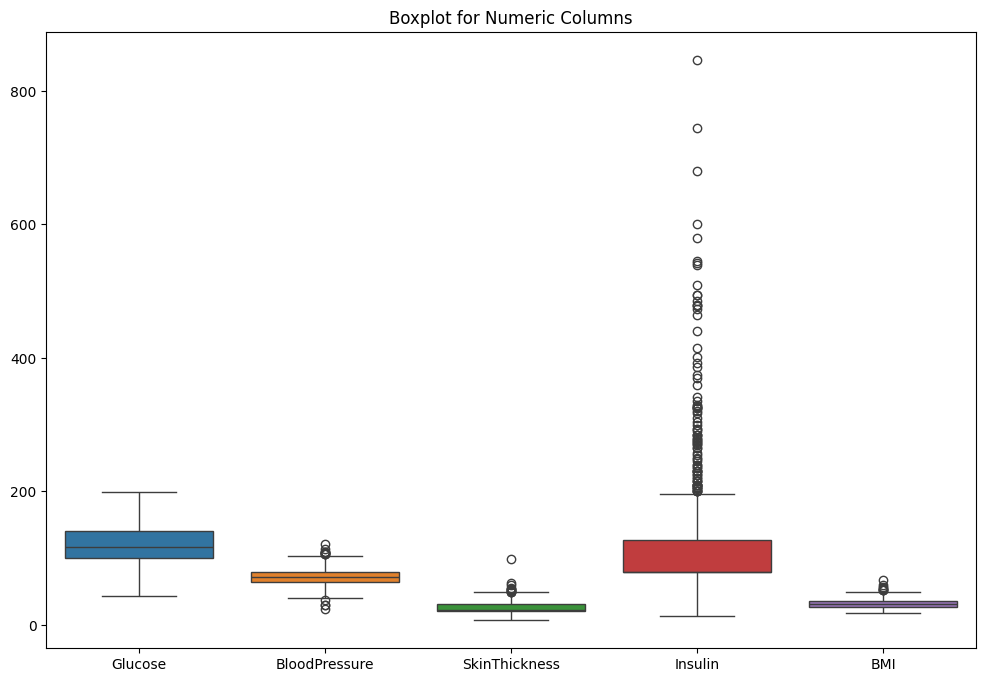

In [12]:
#Detecting outliers and Treatment
plt.figure(figsize=(12,8))
sns.boxplot(data=dataset[Column])
plt.title("Boxplot for Numeric Columns")
plt.show()

In [13]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Finding the Outliers count in selected columns:

In [14]:
def find_Outliers_IQR(dataset,column_name):

  Q1 = dataset[column_name].quantile(0.25)
  Q2 = dataset[column_name].quantile(0.75)

  IQR= Q2-Q1

  lower_bound= Q1-1.5*IQR
  upper_bound= Q2+1.5*IQR

  #Find Outliers
  outliers = dataset[(dataset[column_name] < lower_bound) | (dataset[column_name] > upper_bound)]
  count_outliers=len(outliers)
  return count_outliers

for column_name in Columns:
   outlier_count=find_Outliers_IQR(dataset,column_name)
   print(f"Number of Outliers in the '{column_name}' Column:{outlier_count}")


Number of Outliers in the 'Glucose' Column:0
Number of Outliers in the 'BloodPressure' Column:14
Number of Outliers in the 'SkinThickness' Column:12
Number of Outliers in the 'Insulin' Column:89
Number of Outliers in the 'BMI' Column:8


Outlier Treatment:

In [15]:
sorted(dataset)
Q1 = dataset.quantile(0.20)
Q2 = dataset.quantile(0.80)
IQR = Q2 - Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [16]:
data_cleared_iqr = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q2 + 1.5*IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(dataset.shape)

(688, 9)
(768, 9)


In [17]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

Checking the Outliers after treatment using boxplot


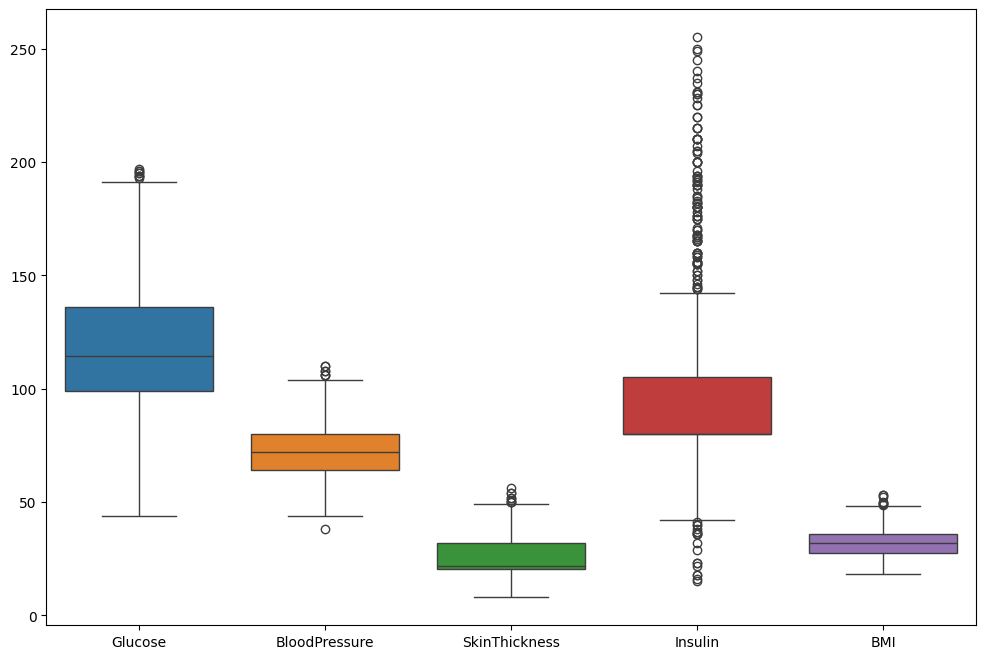

In [19]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
plt.figure(figsize=(12,8))
sns.boxplot(data=col)
plt.show()

**Using Z-Scores to Detect Number of Outliers**

In [20]:
z_scores = zscore(dataset.select_dtypes(include=['float', 'int']))
data_outliers = dataset[(z_scores > 3).any(axis=1)]
print(f"Number of Outliers: {len(data_outliers)}")

Number of Outliers: 48


EDA-Exploratory Data Analysis

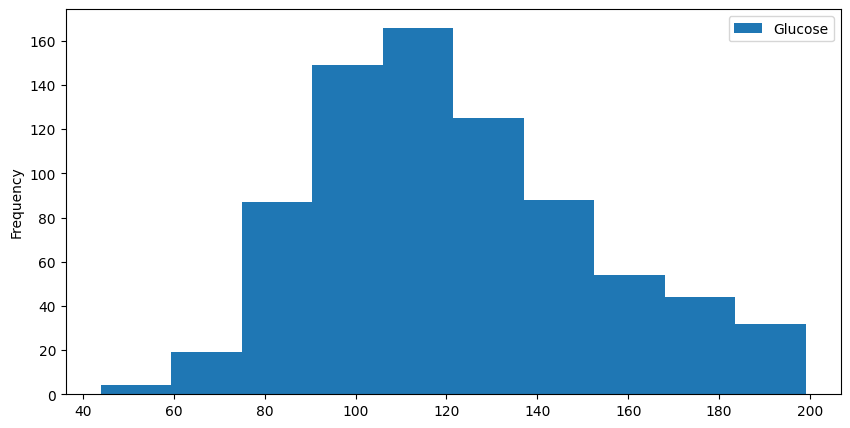

In [21]:
dataset['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

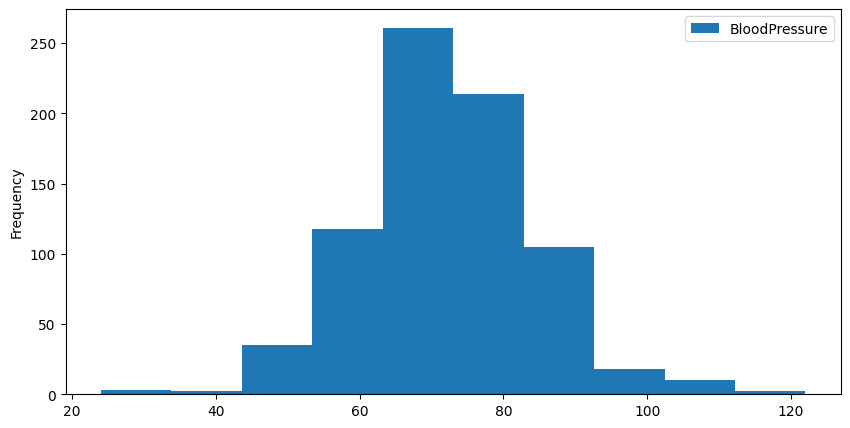

In [22]:
dataset['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

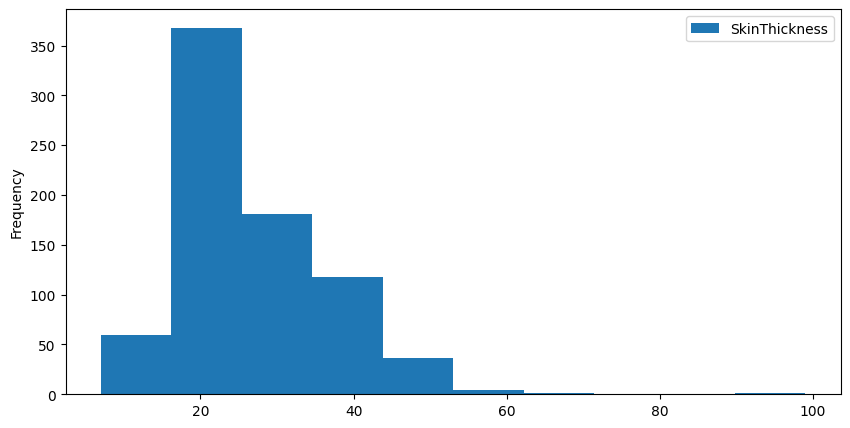

In [23]:
dataset['SkinThickness'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

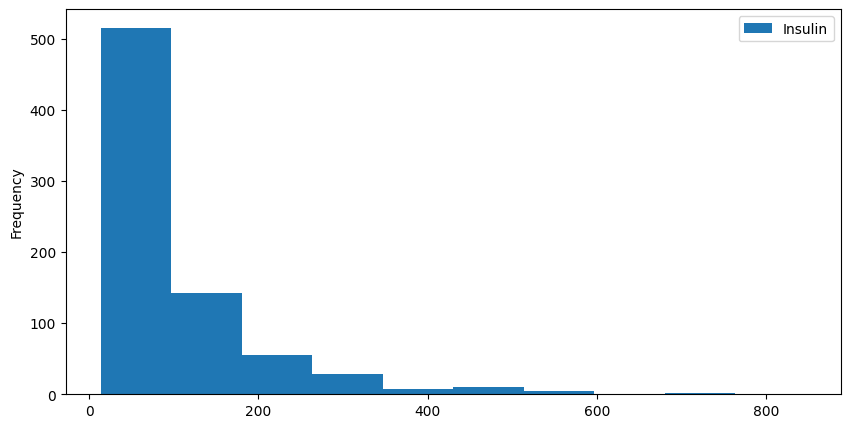

In [24]:
dataset['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

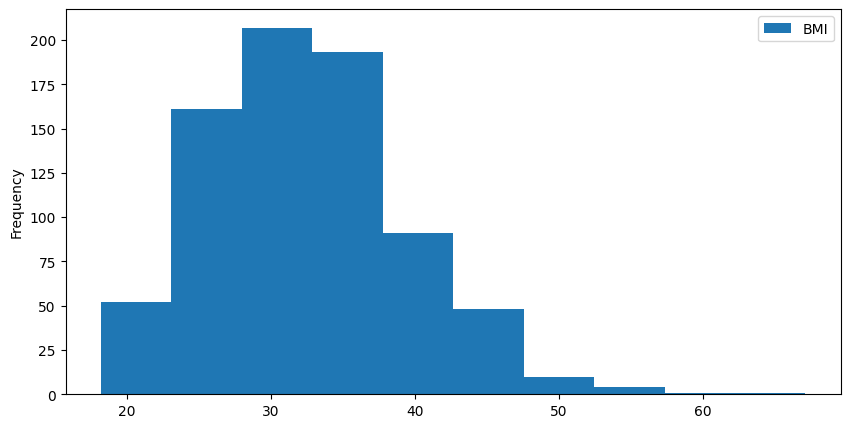

In [25]:
dataset['BMI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

Violin Plot for Important Features


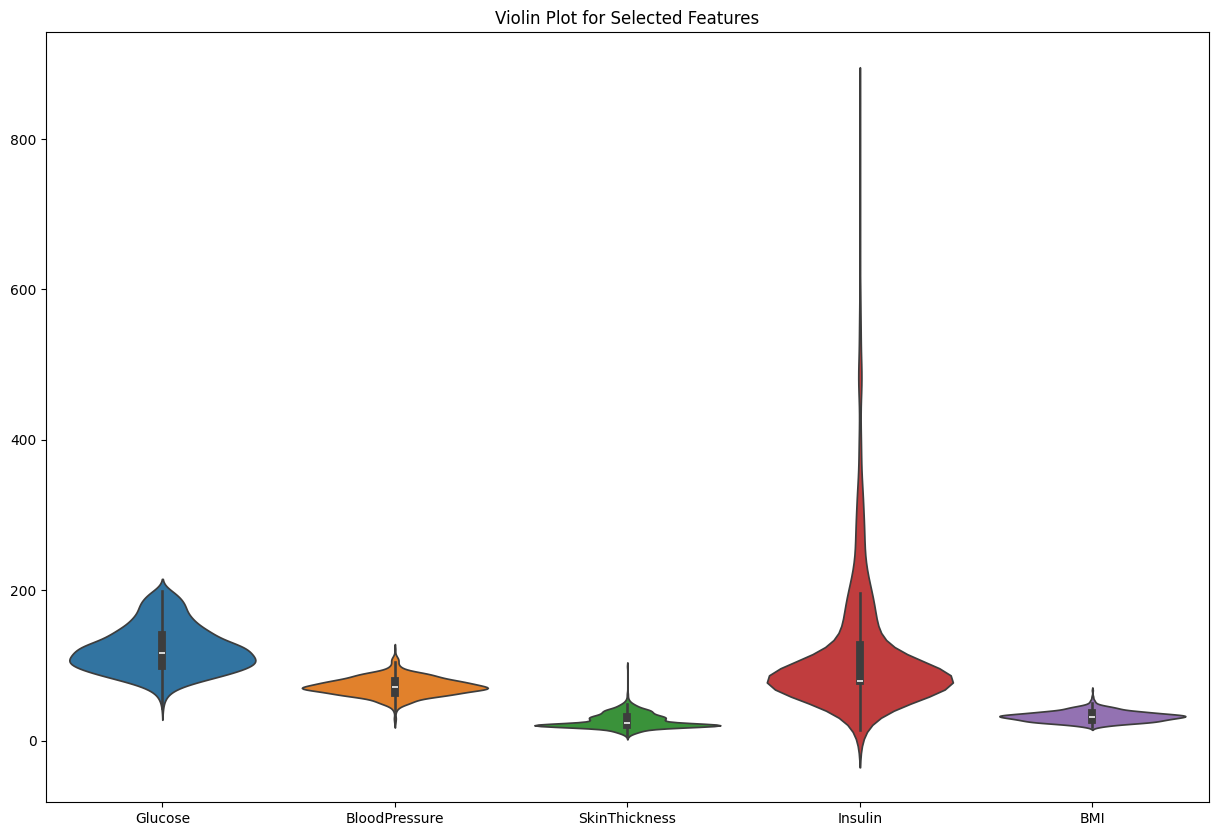

In [26]:
plt.figure(figsize=(15,10))
sns.violinplot(data=dataset[Columns])
plt.title("Violin Plot for Selected Features")
plt.show()

Kernel Density For Important Features

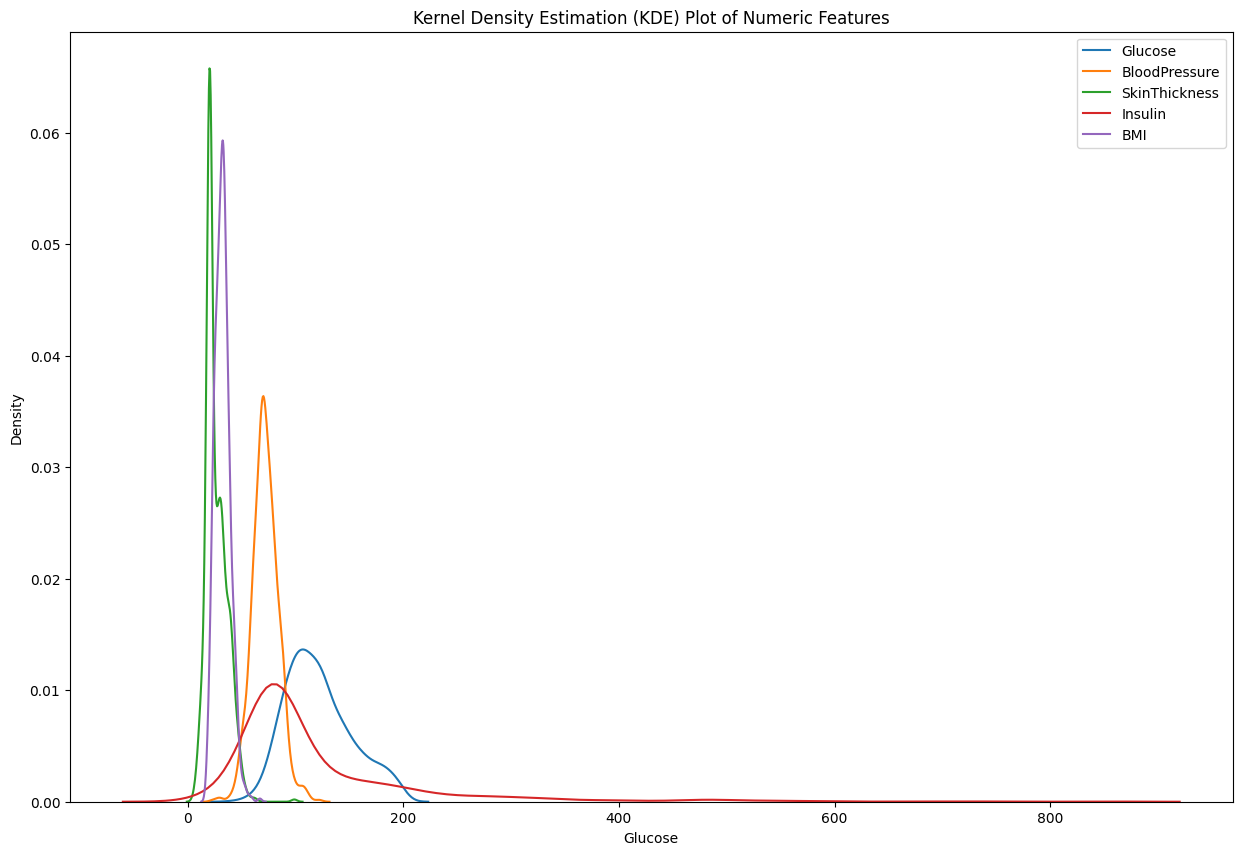

In [27]:
plt.figure(figsize=(15, 10))
for column in Columns:
    sns.kdeplot(dataset[column], label=column)
plt.title("Kernel Density Estimation (KDE) Plot of Numeric Features")
plt.legend()
plt.show()

In [28]:
dataset.dtypes


,0
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


float64    6
int64      3
Name: count, dtype: int64


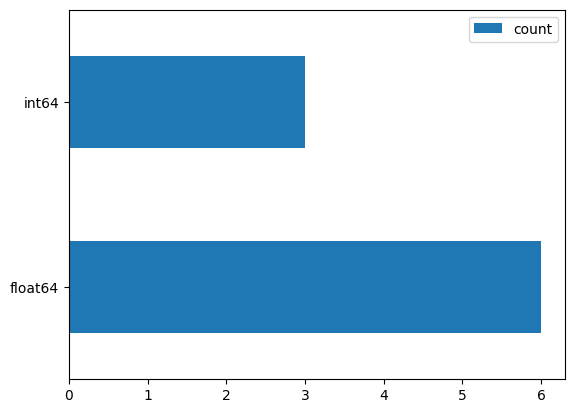

In [29]:
print(dataset.dtypes.value_counts())


figsize=(16,2)
dataset.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

In [30]:
dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


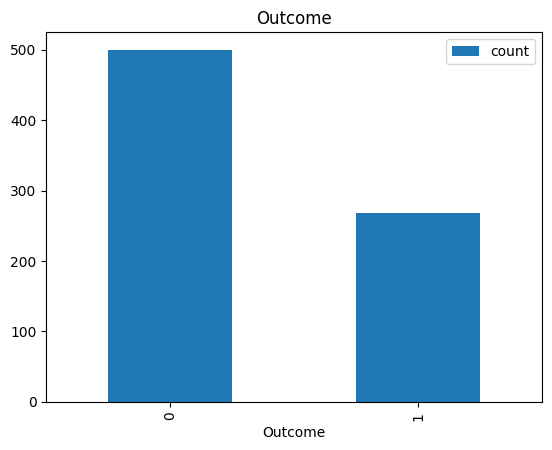

In [31]:
dataset['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title("Outcome")
plt.show()

In [32]:
outcome=(dataset['Outcome'].value_counts()/dataset['Outcome'].shape)*100
outcome

,count
Outcome,
0,65.104167
1,34.895833


In [33]:
balanced_data=100-outcome
balanced_data

,count
Outcome,
0,34.895833
1,65.104167


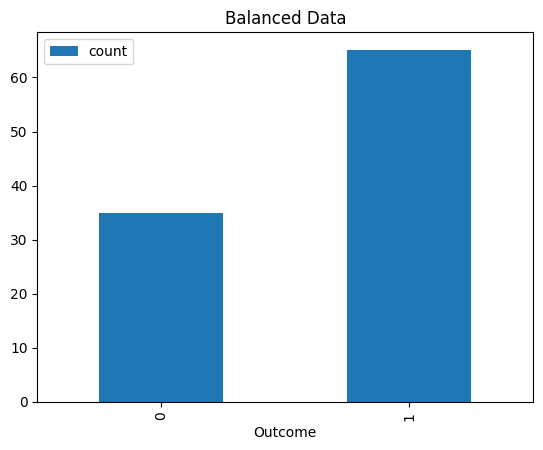

In [34]:
balanced_data.plot(kind='bar')
plt.title("Balanced Data")
plt.legend()
plt.show()

Bi-Variate Analysis

Creating scatter charts between the pair of variables to understand the relationships.

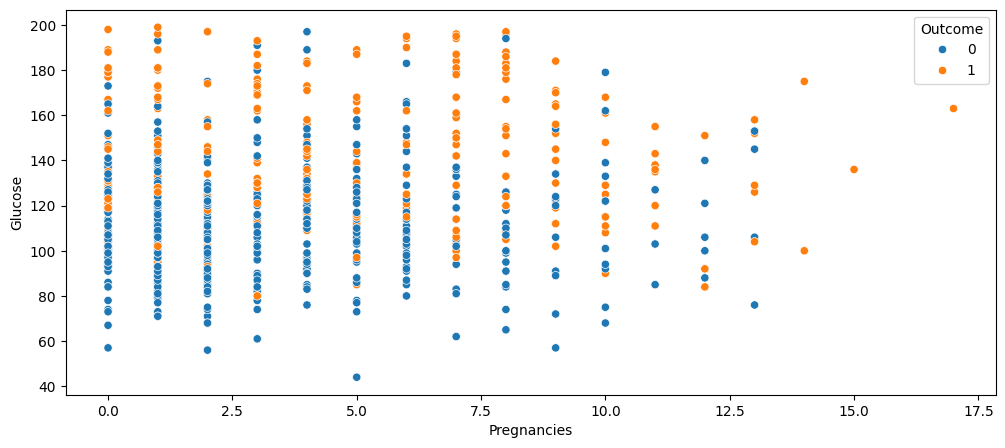

In [35]:
#Bi-Variate Analysis

plt.figure(figsize=(12,5))
sns.scatterplot(x='Pregnancies',y='Glucose',hue='Outcome',data=dataset)
plt.show()

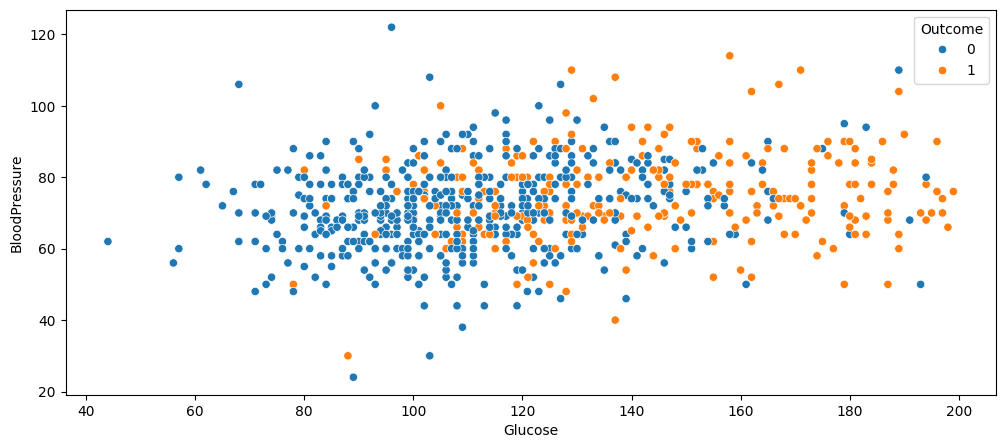

In [36]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=dataset)
plt.show()

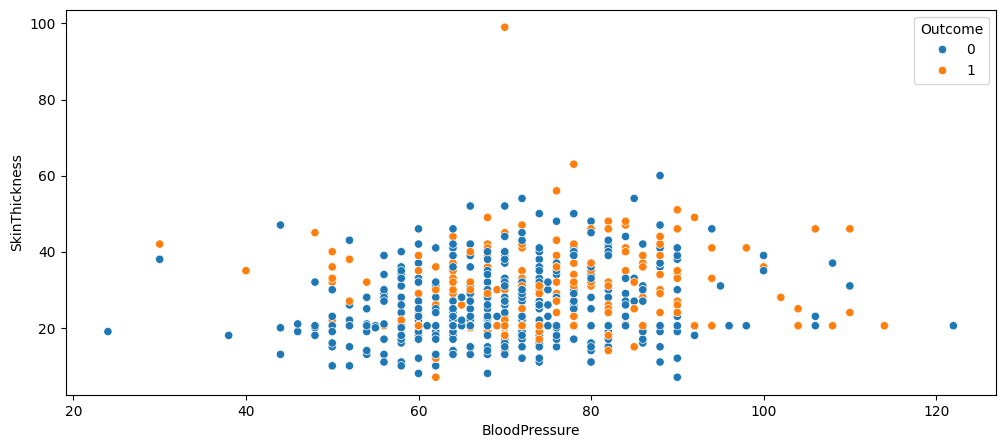

In [37]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=dataset)
plt.show()

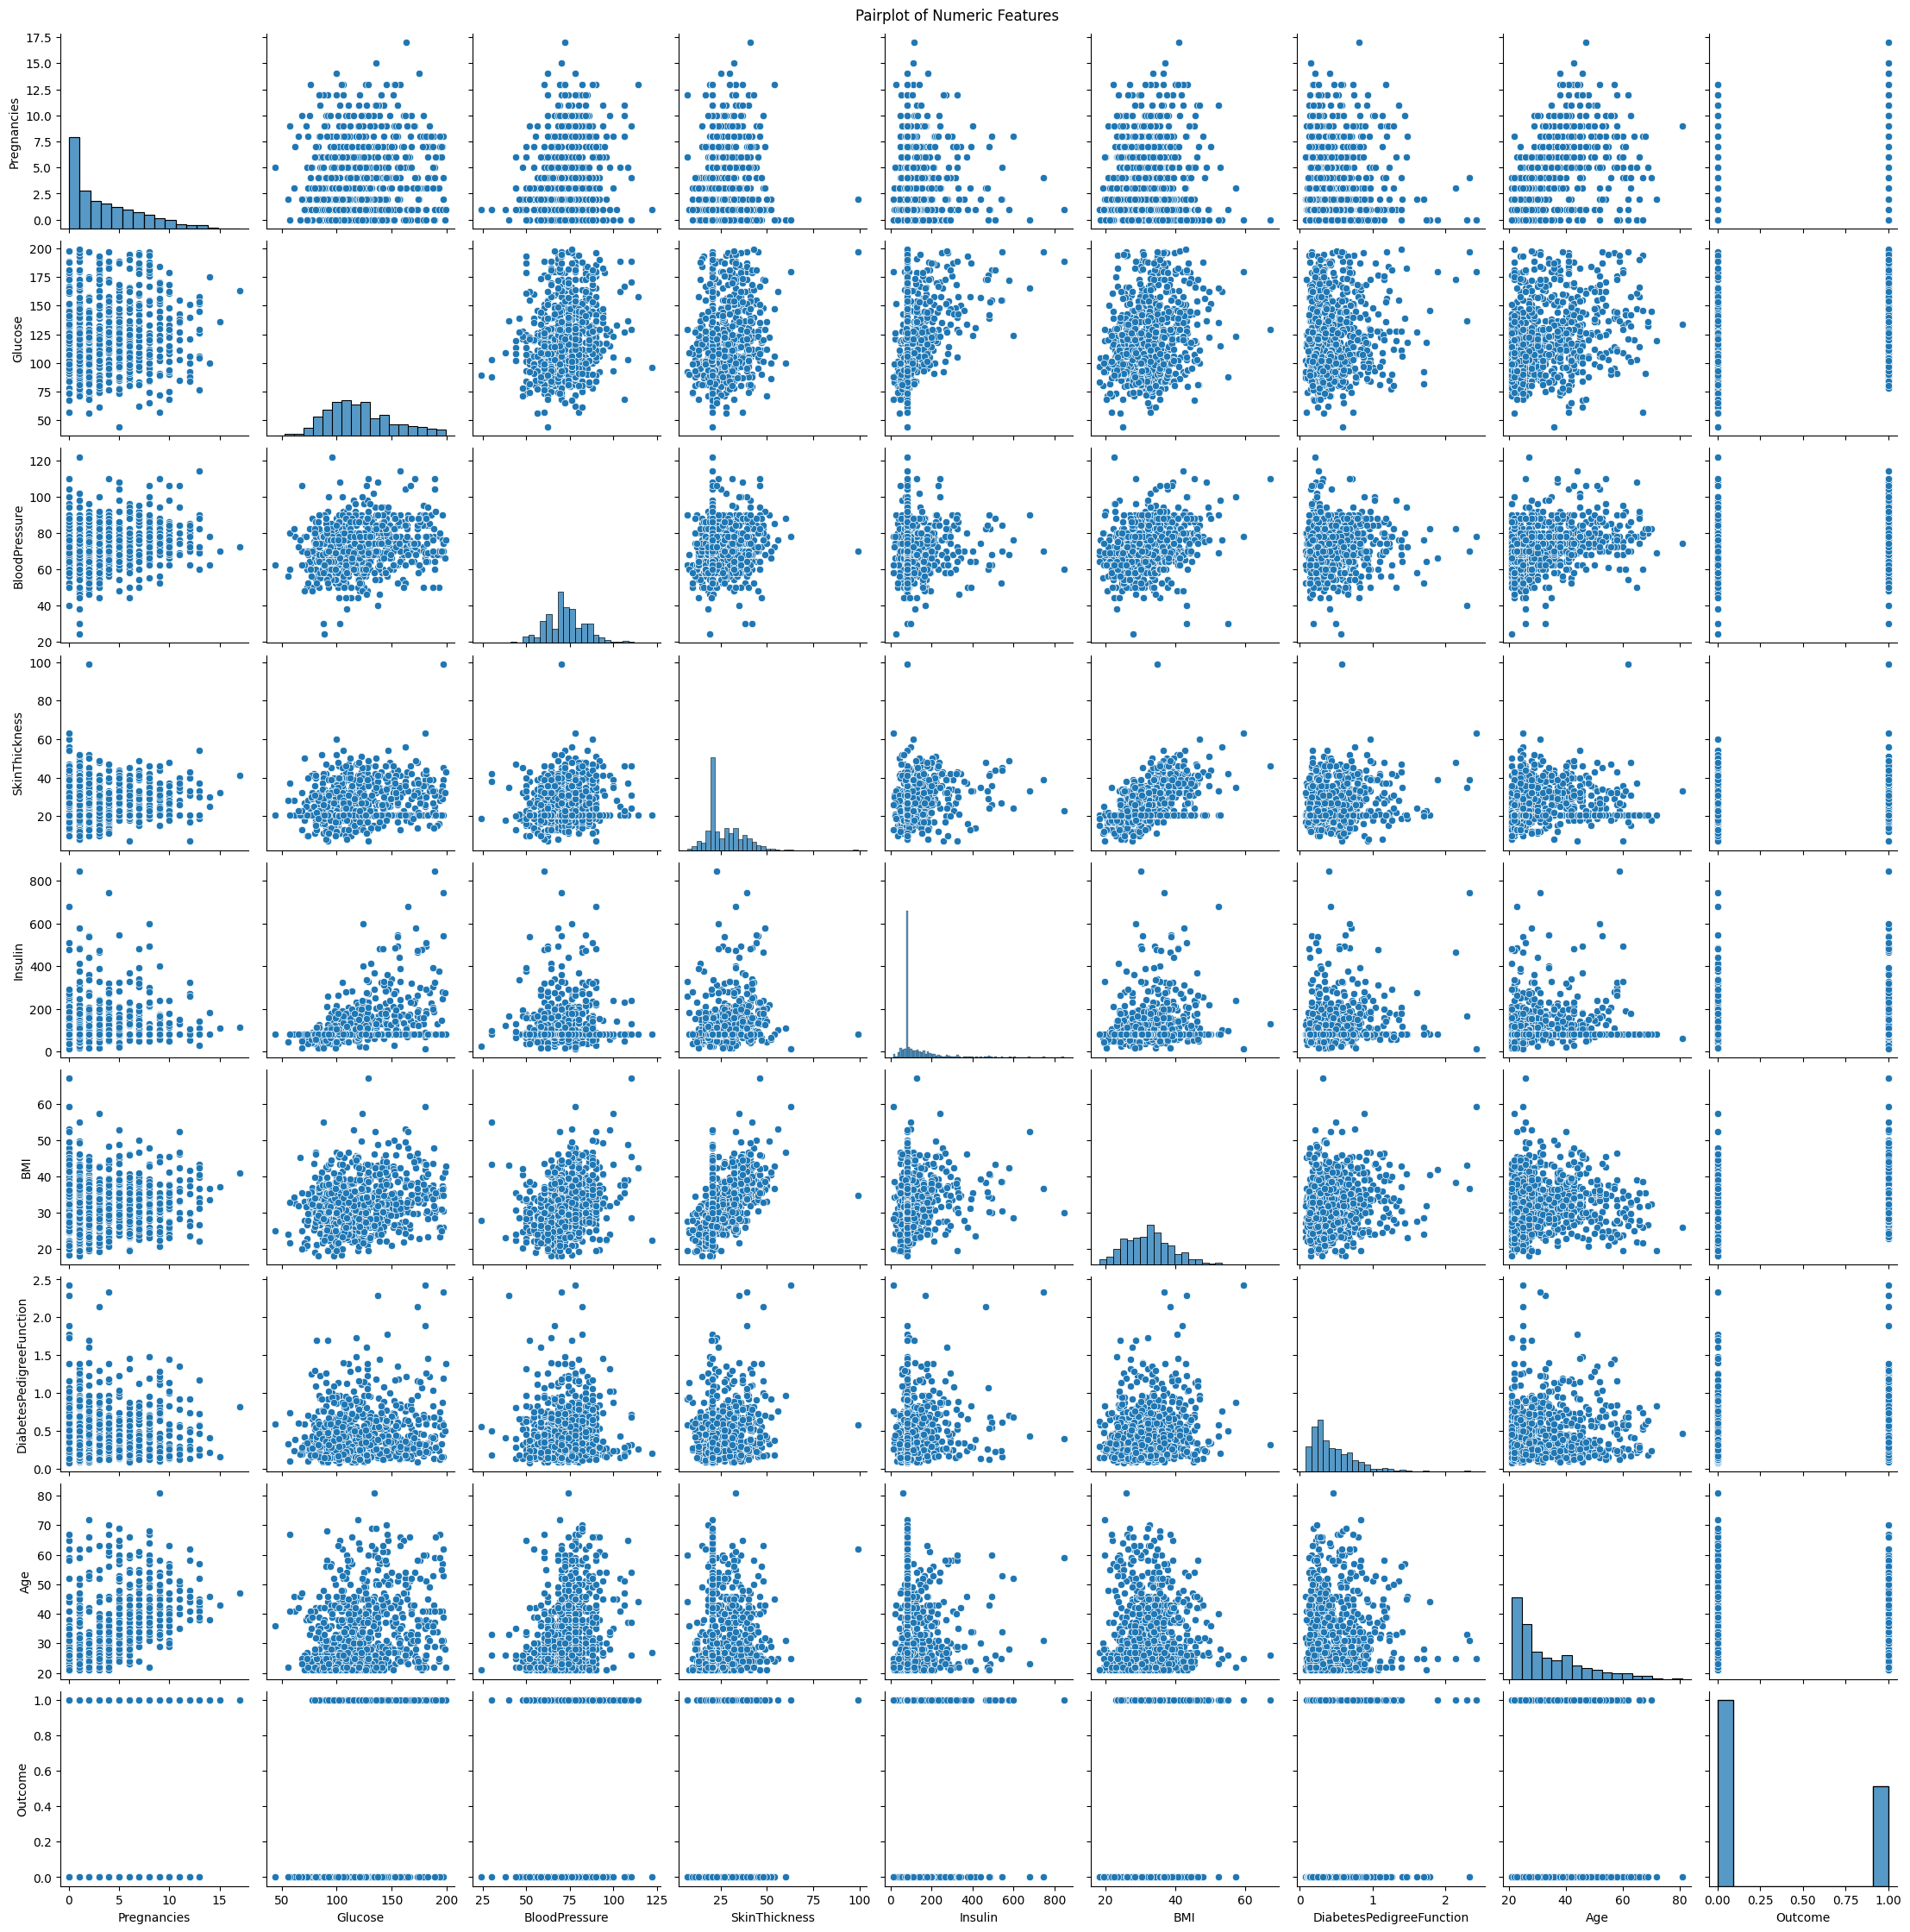

In [38]:
sns.pairplot(dataset)
plt.suptitle("Pairplot of Numeric Features",y=1)
plt.show()

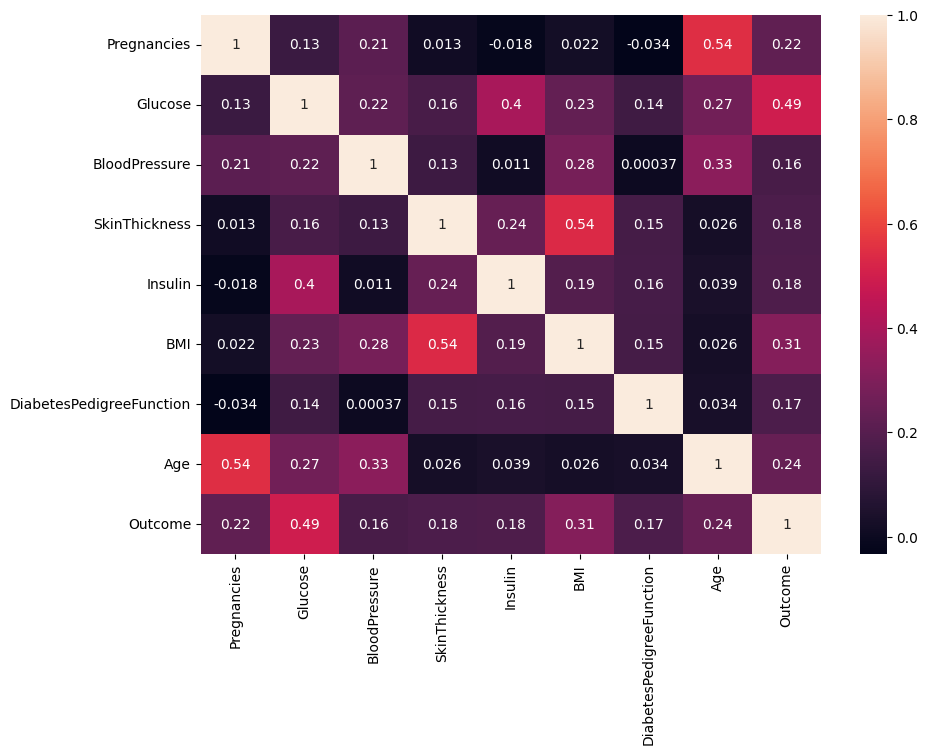

In [39]:
### Multi-Variate Analysis
### Perform correlation analysis. Visually explore it using a heat map.

plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

Data Modeling:

In [40]:
#Data Preparation for Modeling:
x=x=dataset.drop(['Outcome'],axis=1)
y=dataset.Outcome

In [41]:
# Finding the Correlation of every feature with the Outcome (Target Variable
dataset.corrwith(dataset['Outcome'])

,0
Pregnancies,0.221898
Glucose,0.492908
BloodPressure,0.162986
SkinThickness,0.175026
Insulin,0.179185
BMI,0.312254
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [42]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.937867
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


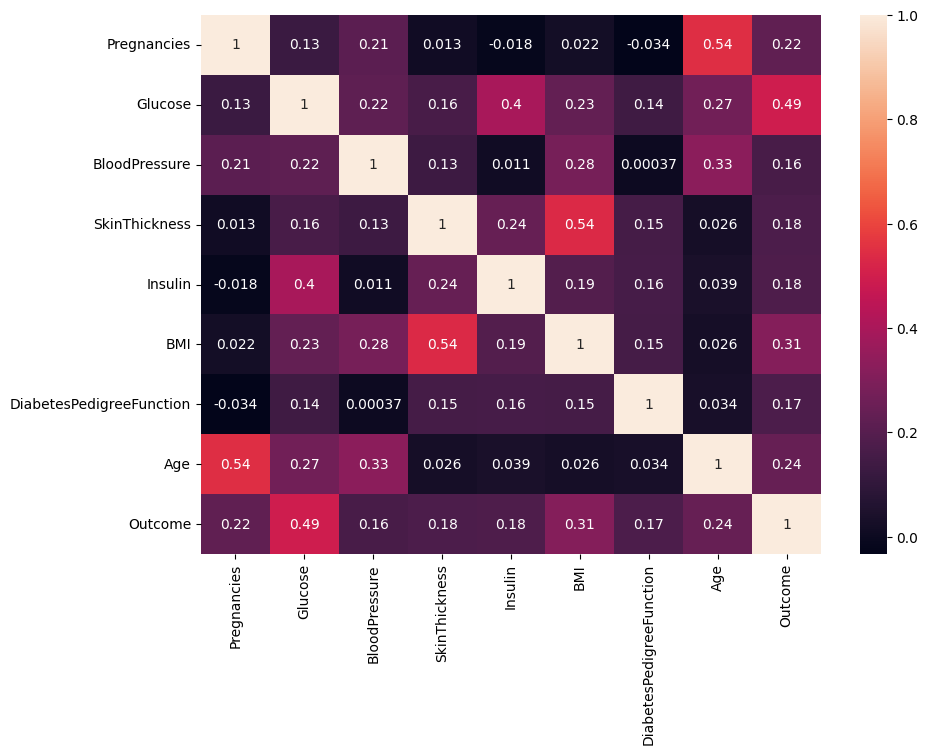

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

Tree-based Classifier


[0.1053734  0.23825366 0.09397536 0.08290291 0.08109083 0.14670177
 0.11344723 0.13825485]




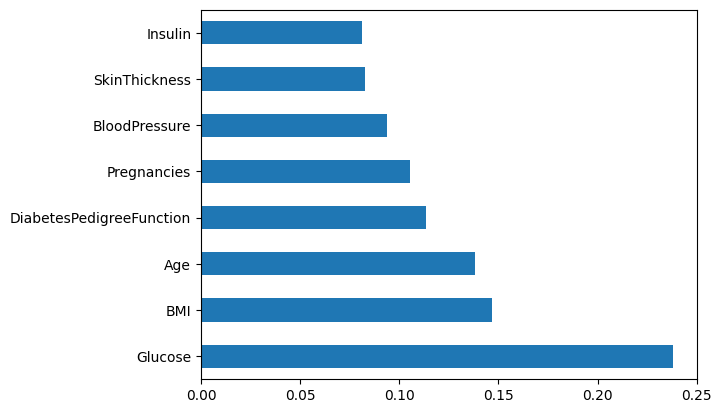

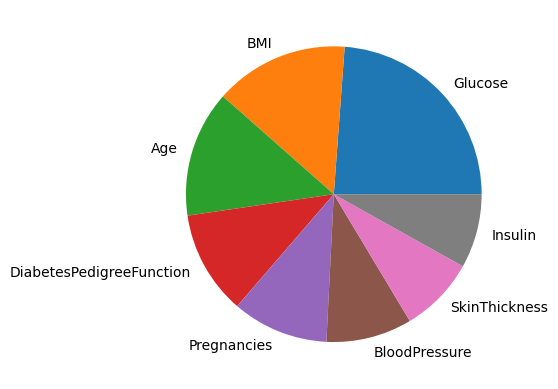

In [44]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
print('\n')
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()
print('\n')
feat_importances.nlargest(8).plot(kind='pie')
plt.show()

In [45]:
new_x=dataset.drop(['Outcome','BloodPressure'],axis=1).values
new_y=dataset.Outcome.values

SMOTE to address the Class Imbalance

Train a Model

In [46]:
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.20,random_state=10)

In [47]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))


print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 405 

After OverSampling, the shape of train_X: (810, 7)
After OverSampling, the shape of train_y: (810,) 

After OverSampling, counts of label '1': 405
After OverSampling, counts of label '0': 405


In [48]:
sc=StandardScaler()
trainx_scaled=sc.fit_transform(trainx)
testx_scaled=sc.fit_transform(testx)

Applying an appropraite classification algorithm to build a Model

Model 1: Building a Logistic Regression Model

In [49]:
LogisticReg=LogisticRegression(solver='liblinear',random_state=123)

In [50]:
LogisticReg.fit(trainx_res,trainy_res)

LogisticRegression(random_state=123, solver='liblinear')

In [51]:
Prediction=LogisticReg.predict(testx)

In [52]:
print('Accuracy_Score - ',accuracy_score(testy,Prediction))
print('Mean_Squared_Error - ',mean_squared_error(testy,Prediction))

Accuracy_Score -  0.7207792207792207
Mean_Squared_Error -  0.2792207792207792


In [53]:
print((confusion_matrix(testy,Prediction)))

[[69 26]
 [17 42]]


In [54]:
print(classification_report(testy,Prediction,zero_division=0))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154



AUC: 0.839


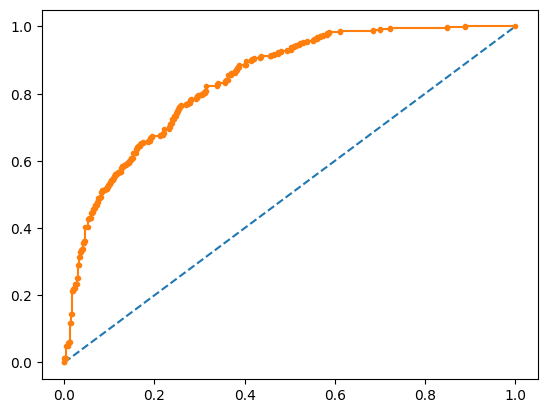

In [55]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = LogisticReg.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

Model 2: Random Forest Classifier

In [56]:
rf=RandomForestClassifier(random_state=42,max_depth=5)

In [57]:
rf.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [58]:
rf_predict=rf.predict(testx)

In [59]:
print('Accuracy_score -',accuracy_score(testy,rf_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_predict))

Accuracy_score - 0.7597402597402597
Mean_squared_error - 0.24025974025974026


In [60]:
# RandomForestClassifier( Hyper Parameter Tuning )

In [61]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3],
'max_leaf_nodes':[1,2,3],'max_samples':[2,4,3]}

In [62]:
grid=GridSearchCV( estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)


In [63]:
rf_grid=RandomForestClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=3,max_samples=4,min_samples_leaf= 1,min_samples_split=3,
 n_estimators= 400,random_state=42)

In [64]:

rf_grid.fit(trainx_res,trainy_res)


RandomForestClassifier(max_depth=2, max_leaf_nodes=3, max_samples=4,
                       min_samples_split=3, n_estimators=400, random_state=42)

In [65]:

rf_grid_predict=rf_grid.predict(testx)

In [66]:

print('Accuracy_score -',accuracy_score(testy,rf_grid_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_grid_predict))

Accuracy_score - 0.7337662337662337
Mean_squared_error - 0.2662337662337662


In [67]:
print((confusion_matrix(testy,Prediction)))

[[69 26]
 [17 42]]


In [68]:
print(classification_report(testy,Prediction))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154



AUC: 0.939


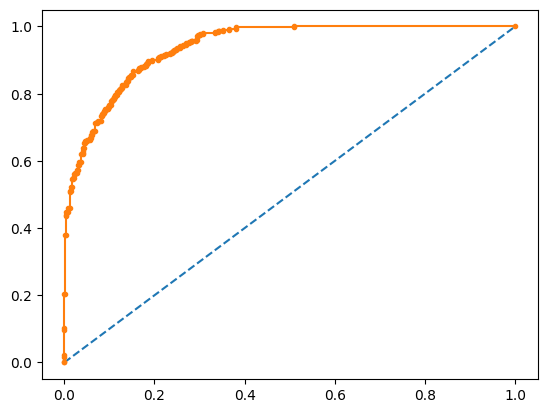

In [69]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = rf.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

Model 3: Decision Tree Classifier

In [70]:
dc=DecisionTreeClassifier(random_state=42)

In [71]:
dc.fit(trainx_res,trainy_res)

DecisionTreeClassifier(random_state=42)

In [72]:
dc_pred=dc.predict(testx)

In [73]:
print('Accuracy_score -',accuracy_score(testy,dc_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_pred))

Accuracy_score - 0.6233766233766234
Mean_squared_error - 0.37662337662337664


In [74]:
### DecisionTreeClassifier( Hyper Parameter Tunning )

In [75]:
dc_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3],
'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [76]:
import warnings
warnings.filterwarnings('ignore')
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [77]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [78]:
dc_final=DecisionTreeClassifier(criterion= 'gini', max_depth=2,max_leaf_nodes=4,min_samples_leaf= 1,
min_samples_split= 2,splitter='best',random_state=42)

In [79]:
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)

In [80]:
print('Accuracy_score -',accuracy_score(testy,dc_final_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_final_pred))

Accuracy_score - 0.6883116883116883
Mean_squared_error - 0.3116883116883117


In [81]:
print((confusion_matrix(testy,dc_final_pred)))

[[73 22]
 [26 33]]


In [82]:
print((classification_report(testy,dc_final_pred)))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



AUC: 0.792


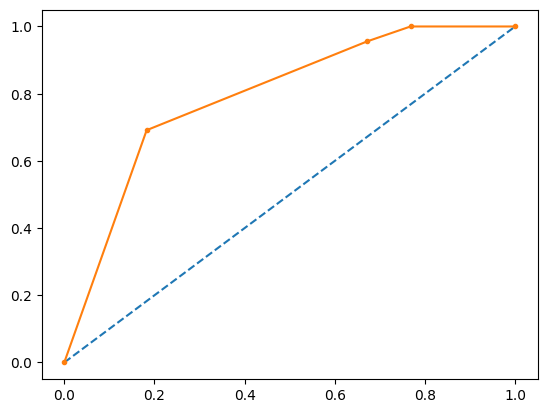

In [83]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = dc_final.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

In [84]:

Algorithms=['RandomForest','Decisiontree']
Accuracy_Score=[accuracy_score(testy,rf_grid_predict),accuracy_score(testy,dc_final_pred)]
# Create a DataFrame
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score})

# Display the accuracy table
print(accuracy_df)

      Algorithm  Accuracy
0  RandomForest  0.733766
1  Decisiontree  0.688312


Model 4: Gradient Boosting Classifier

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

Gradient Boosting Classifier Performance:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        95
           1       0.66      0.64      0.65        59

    accuracy                           0.73       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.73      0.73      0.73       154

Accuracy: 0.7338
Mean Squared Error: 0.2662


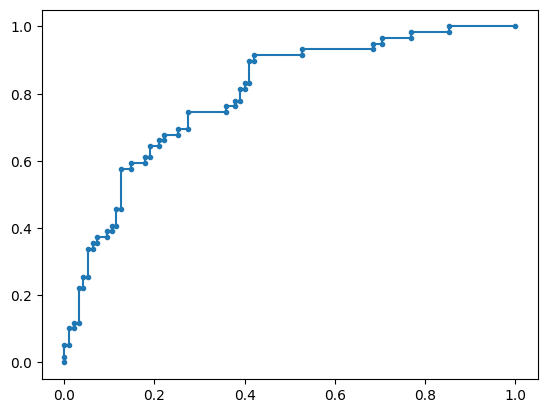

In [86]:
# Train Gradient Boosting Classifier with Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 5]
}

grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_gb.fit(trainx_res,trainy_res)

# Best Gradient Boosting Model
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(testx)

# Model Evaluation
print("Gradient Boosting Classifier Performance:")
print(classification_report(testy, y_pred_gb))
print(f"Accuracy: {accuracy_score(testy, y_pred_gb):.4f}")
print(f"Mean Squared Error: {mean_squared_error(testy, y_pred_gb):.4f}")

# ROC Curve for Gradient Boosting
probs_gb = best_gb.predict_proba(testx)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(testy, probs_gb)
auc_gb = roc_auc_score(testy, probs_gb)

plt.plot(fpr_gb, tpr_gb, marker='.', label=f'Gradient Boosting (AUC = {auc_gb:.3f})')


In [87]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(trainx_res,trainy_res)

# Predictions
y_pred_gb = gb_model.predict(testx)

# Model Evaluation
print("Gradient Boosting Classifier Performance:")
print(classification_report(testy, y_pred_gb))
print(f"Accuracy: {accuracy_score(testy, y_pred_gb):.4f}")

Gradient Boosting Classifier Performance:
              precision    recall  f1-score   support

           0       0.85      0.75      0.79        95
           1       0.66      0.78      0.71        59

    accuracy                           0.76       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154

Accuracy: 0.7597


AUC: 0.978


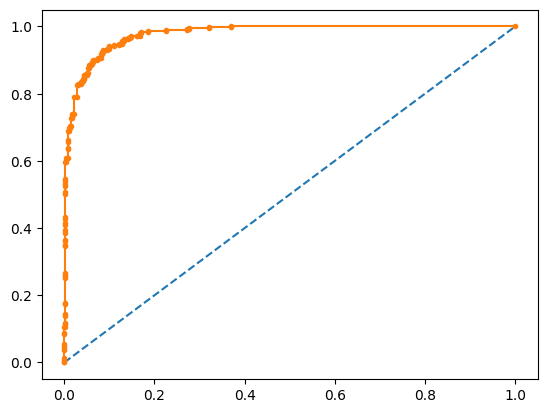

In [88]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = gb_model.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

Model 5: Support Vector Machine (SVM)

In [89]:
from sklearn.svm import SVC

SVM Classifier Performance:
              precision    recall  f1-score   support

           0       0.73      0.89      0.81        95
           1       0.74      0.47      0.58        59

    accuracy                           0.73       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154

Accuracy: 0.7338
Mean Squared Error: 0.2662


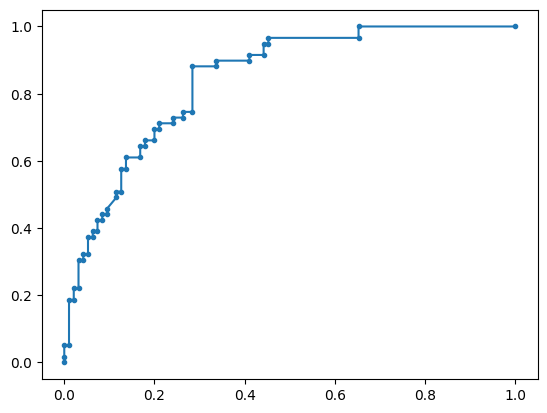

In [90]:
# Train SVM Classifier with Hyperparameter Tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(trainx_scaled, trainy)

# Best SVM Model
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(testx_scaled)

# Model Evaluation
print("SVM Classifier Performance:")
print(classification_report(testy, y_pred_svm))
print(f"Accuracy: {accuracy_score(testy, y_pred_svm):.4f}")
print(f"Mean Squared Error: {mean_squared_error(testy, y_pred_svm):.4f}")

# ROC Curve for SVM
probs_svm = best_svm.predict_proba(testx_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(testy, probs_svm)
auc_svm = roc_auc_score(testy, probs_svm)

plt.plot(fpr_svm, tpr_svm, marker='.', label=f'SVM (AUC = {auc_svm:.3f})')


In [91]:
# Train SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(trainx_scaled,trainy)

# Predictions
y_pred_svm = svm_model.predict(testx_scaled)

# Model Evaluation
print("Support Vector Machine (SVM) Performance:")
print(classification_report(testy, y_pred_svm))
print(f"Accuracy: {accuracy_score(testy, y_pred_svm):.4f}")


Support Vector Machine (SVM) Performance:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        95
           1       0.68      0.42      0.52        59

    accuracy                           0.70       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.70      0.70      0.68       154

Accuracy: 0.7013


AUC Score for SVM: 0.829


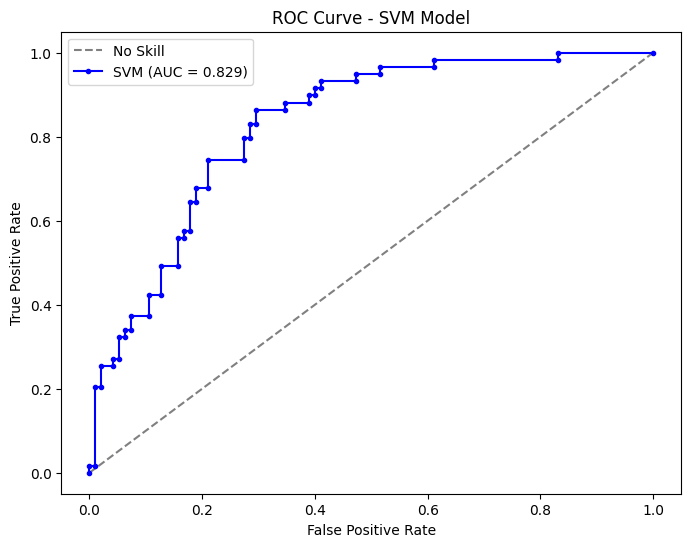

In [92]:
# Predict probabilities for SVM Model
svm_probs = svm_model.predict_proba(testx_scaled)[:, 1]  # Only positive class probabilities

# Compute AUC Score
auc_svm = roc_auc_score(testy, svm_probs)
print(f'AUC Score for SVM: {auc_svm:.3f}')

# Compute ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(testy, svm_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='No Skill')
plt.plot(fpr_svm, tpr_svm, marker='.', label=f'SVM (AUC = {auc_svm:.3f})', color='blue')

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Model')
plt.legend()
plt.show()


In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define function to evaluate models
def evaluate_model(model, test_x, test_y):
    predictions = model.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(confusion_matrix(test_y, predictions))
    print(classification_report(test_y, predictions))
    print("\n")

# Model 1: Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=123)
logreg.fit(trainx_res, trainy_res)
evaluate_model(logreg, testx, testy)

# Model 2: Random Forest Classifier
rf_grid.fit(trainx_res, trainy_res)
evaluate_model(rf_grid, testx, testy)

# Model 3: Decision Tree Classifier
dc_final.fit(trainx_res, trainy_res)
evaluate_model(dc_final, testx, testy)

# Model 4: KNeighbors Classifier (as an additional model)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainx_res, trainy_res)
evaluate_model(knn, testx, testy)

# Optional: Hyperparameter tuning for KNeighbors Classifier
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1)
grid_knn.fit(trainx_res, trainy_res)
best_knn = grid_knn.best_estimator_
print("Best KNeighbors Classifier:", best_knn)
evaluate_model(best_knn, testx, testy)

Model: LogisticRegression
Accuracy: 0.7208
Precision: 0.6176
Recall: 0.7119
F1 Score: 0.6614
[[69 26]
 [17 42]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154



Model: RandomForestClassifier
Accuracy: 0.7338
Precision: 0.6154
Recall: 0.8136
F1 Score: 0.7007
[[65 30]
 [11 48]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        95
           1       0.62      0.81      0.70        59

    accuracy                           0.73       154
   macro avg       0.74      0.75      0.73       154
weighted avg       0.76      0.73      0.74       154



Model: DecisionTreeClassifier
Accuracy: 0.6883
Precision: 0.6000
Recall: 0.5593
F1 Score: 0.5789
[[73 22]
 [26 33]

                        Model  Accuracy  Precision    Recall  F1 Score
0          LogisticRegression  0.720779   0.617647  0.711864  0.661417
1      RandomForestClassifier  0.733766   0.615385  0.813559  0.700730
2      DecisionTreeClassifier  0.688312   0.600000  0.559322  0.578947
3        KNeighborsClassifier  0.616883   0.500000  0.593220  0.542636
4  GradientBoostingClassifier  0.759740   0.657143  0.779661  0.713178
5                         SVC  0.701299   0.675676  0.423729  0.520833


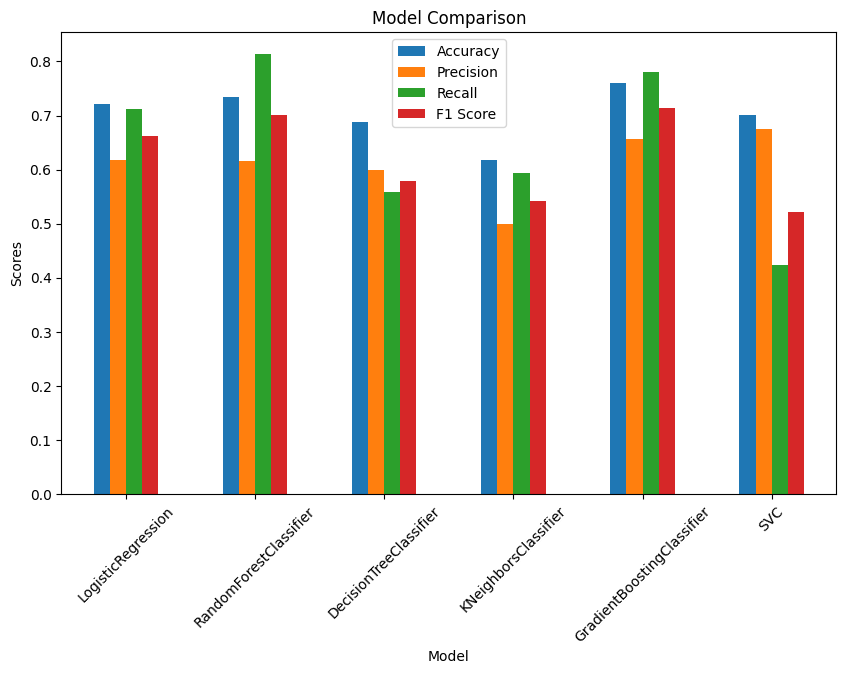

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate and store results
def evaluate_and_store(model, test_x, test_y, results):
    predictions = model.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)

    results.append({
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# List to store results
results = []

# Evaluate models
evaluate_and_store(logreg, testx, testy, results)
evaluate_and_store(rf_grid, testx, testy, results)
evaluate_and_store(dc_final, testx, testy, results)
evaluate_and_store(knn, testx, testy, results)
evaluate_and_store(gb_model,testx,testy,results)
evaluate_and_store(svm_model,testx_scaled,testy,results)
#evaluate_and_store(best_gb_model, testx, testy, results)

# Convert results to DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Step 4: Visualizing results
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


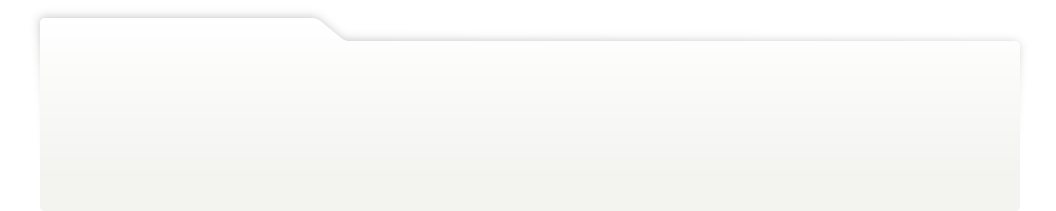
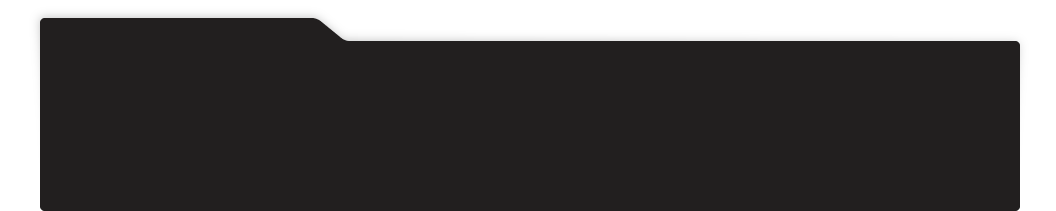
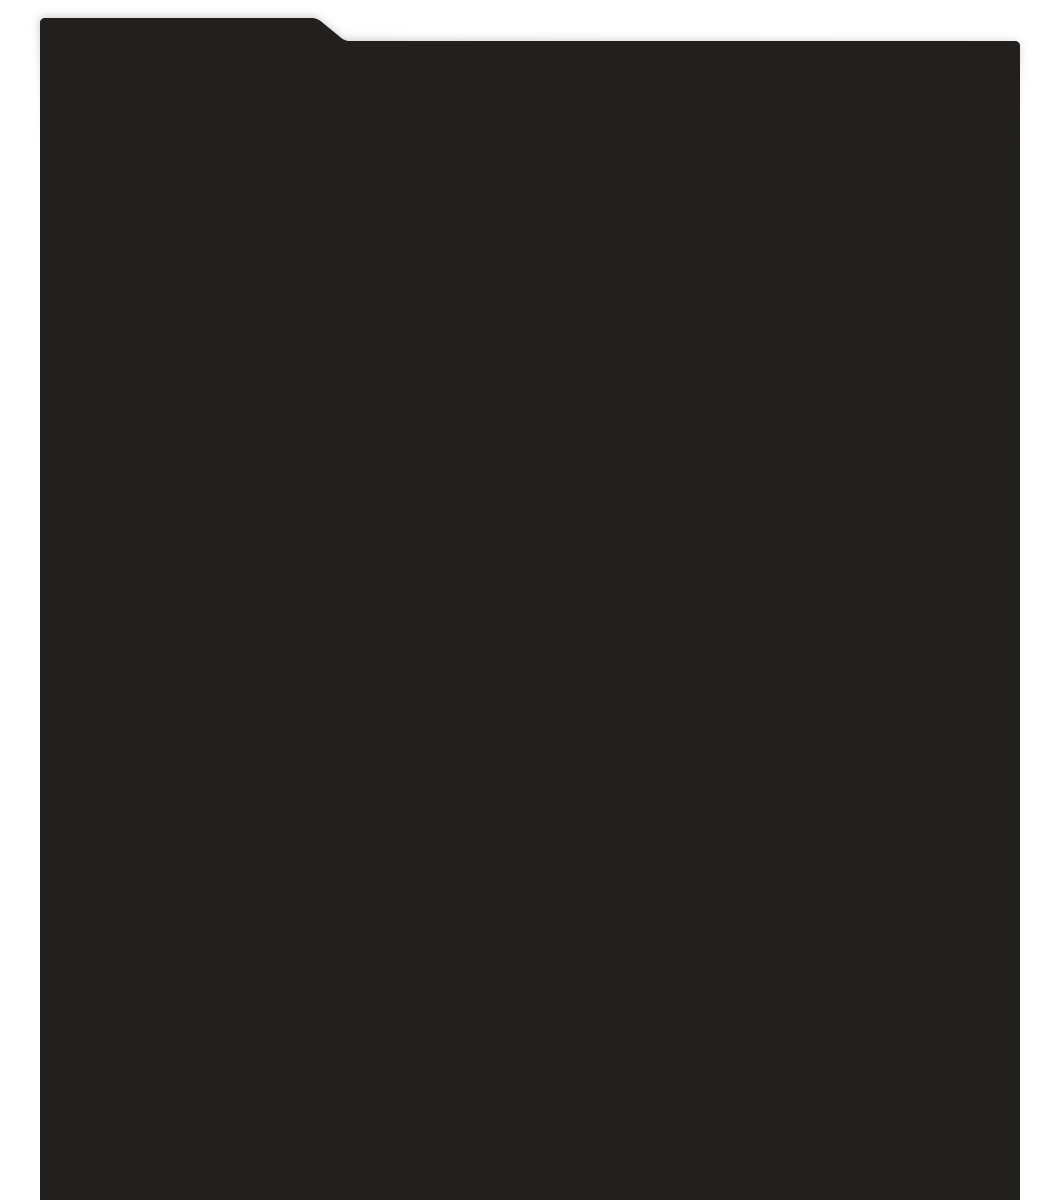
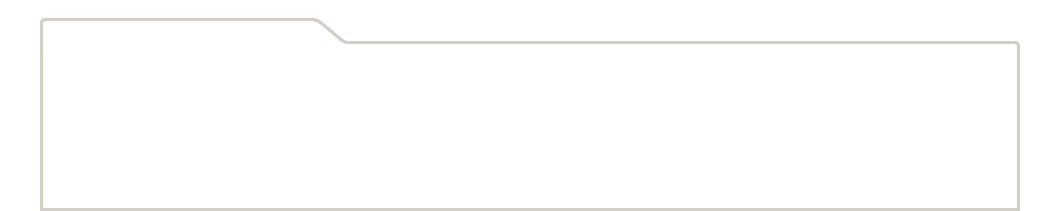
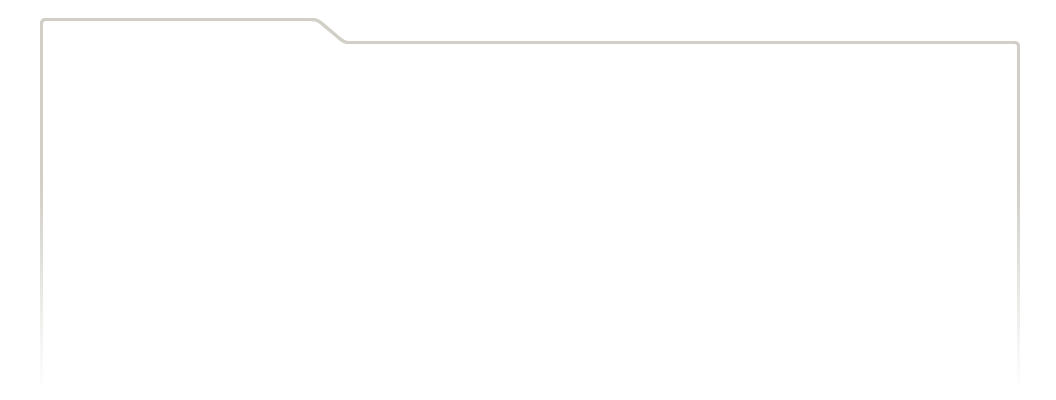
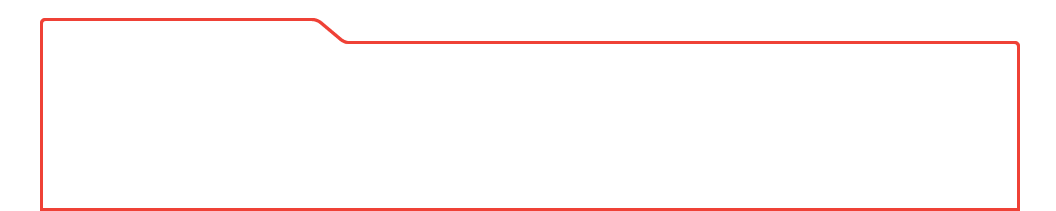
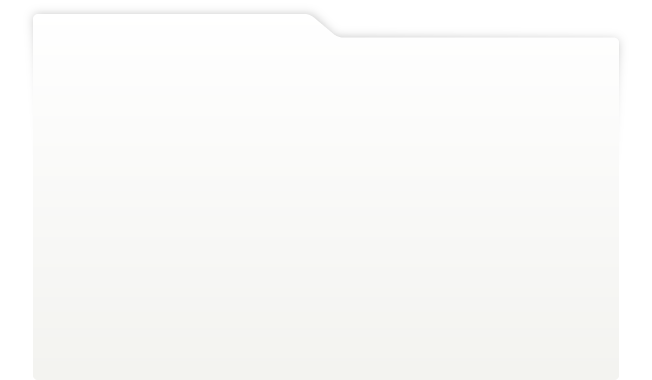
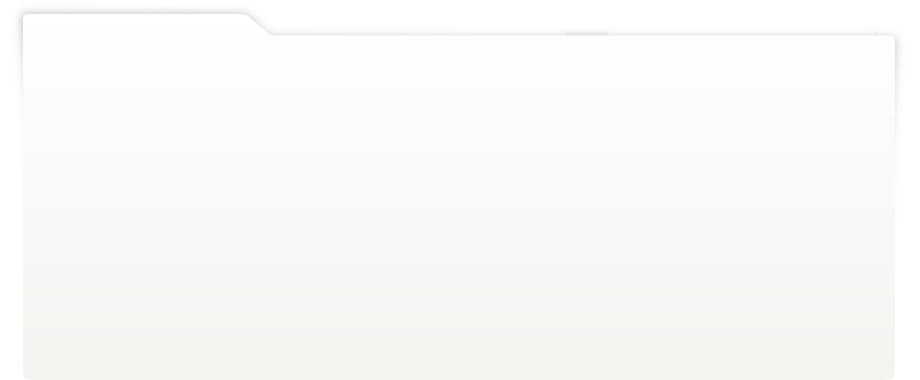
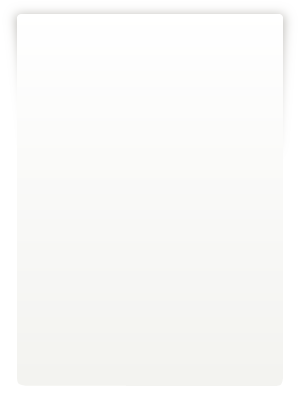
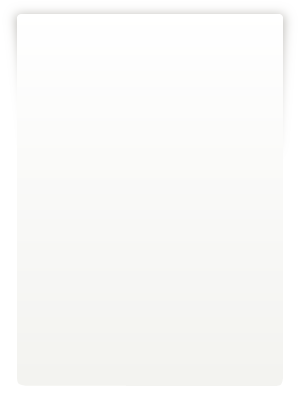
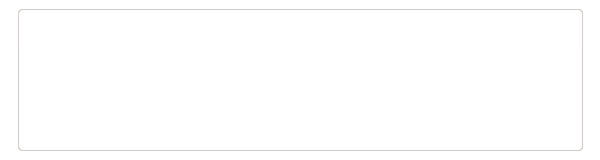
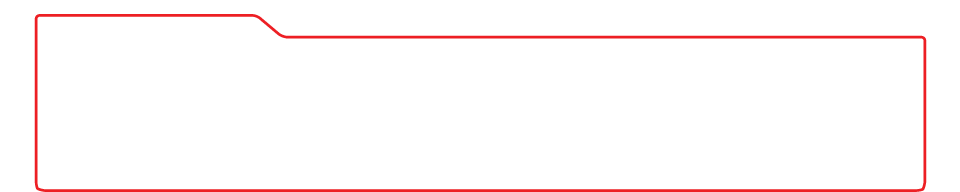
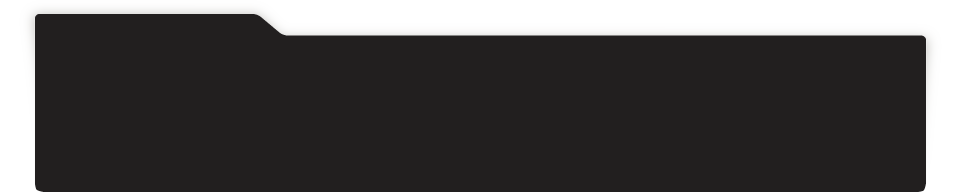
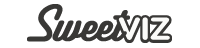
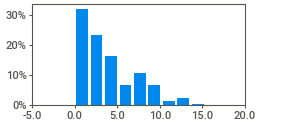
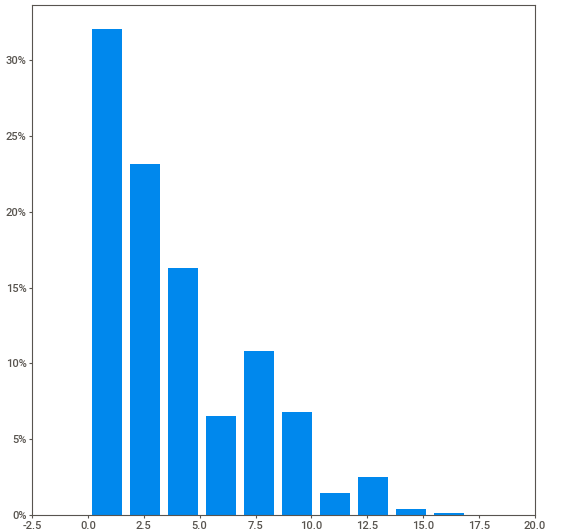
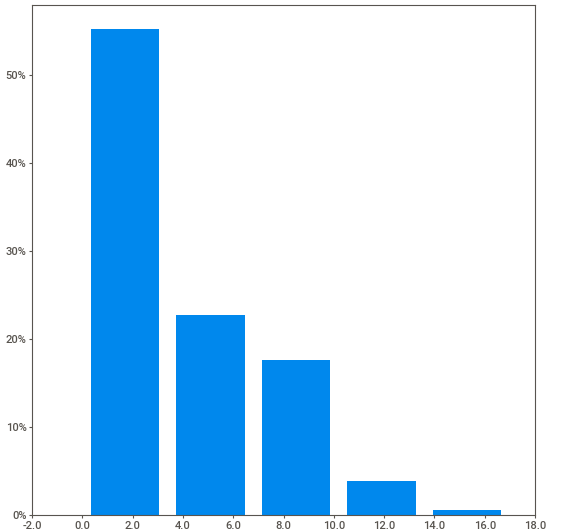
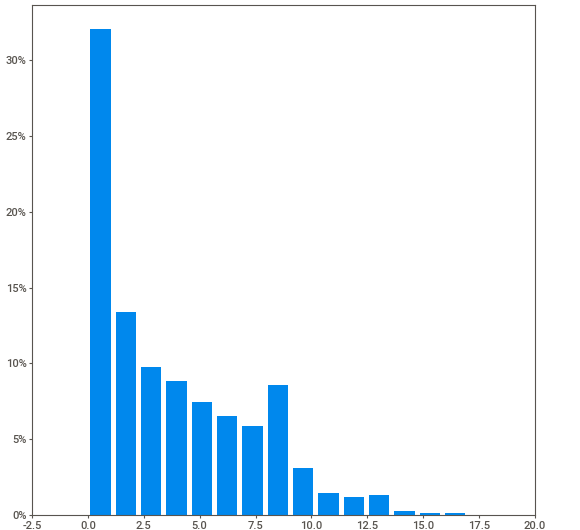
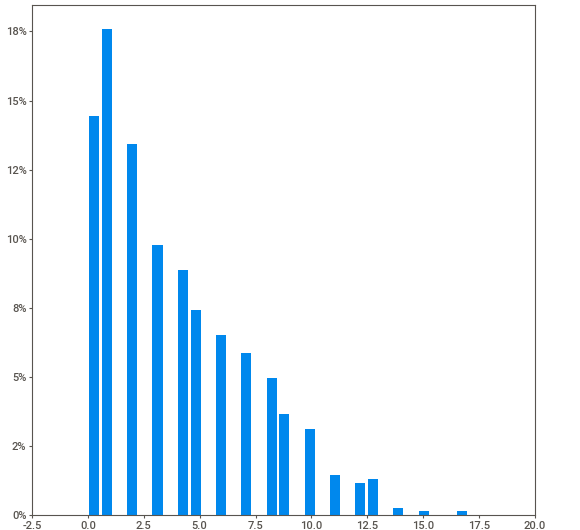
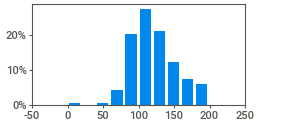
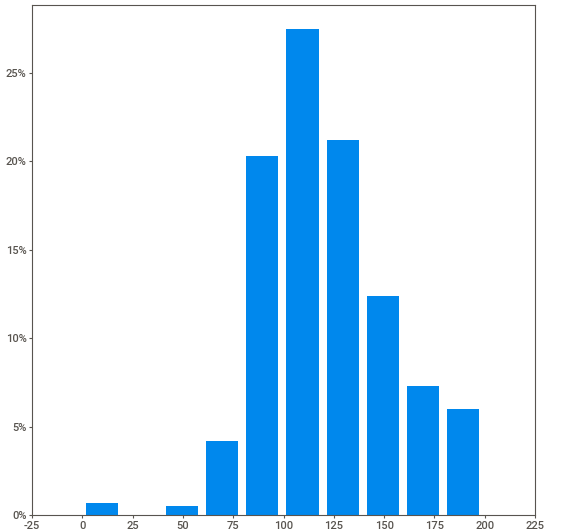
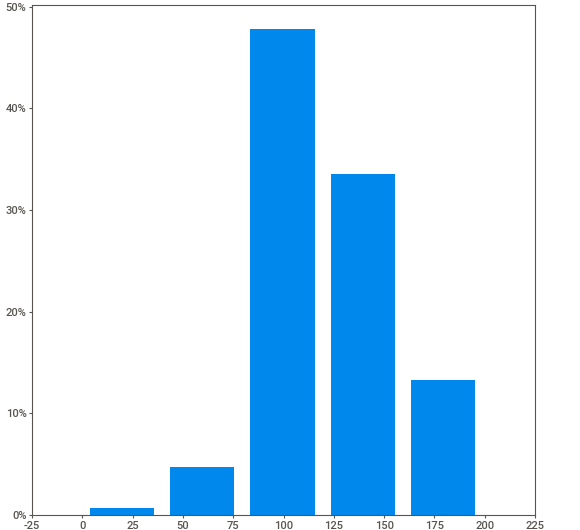
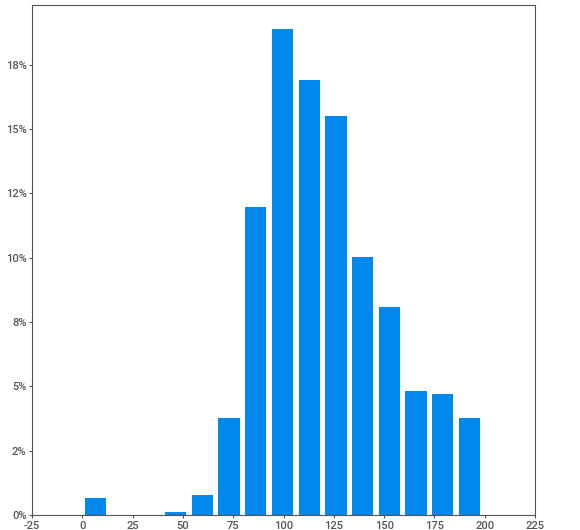
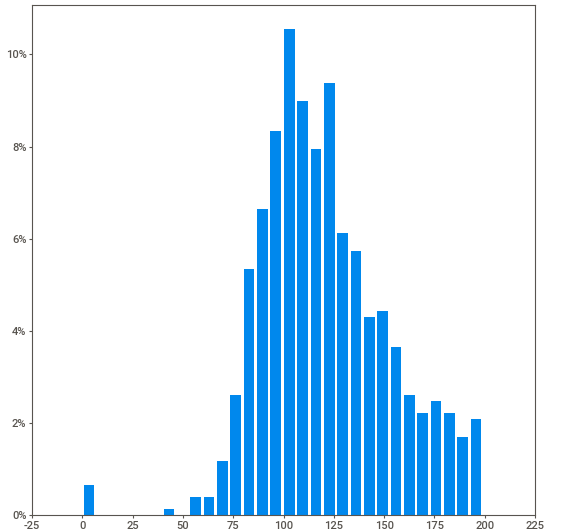
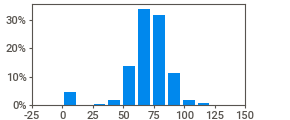
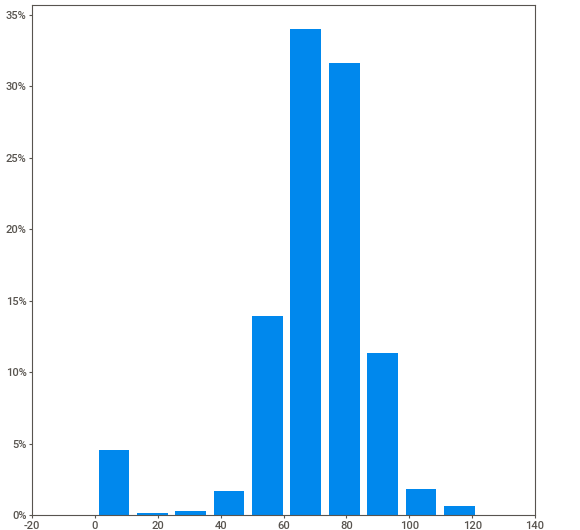
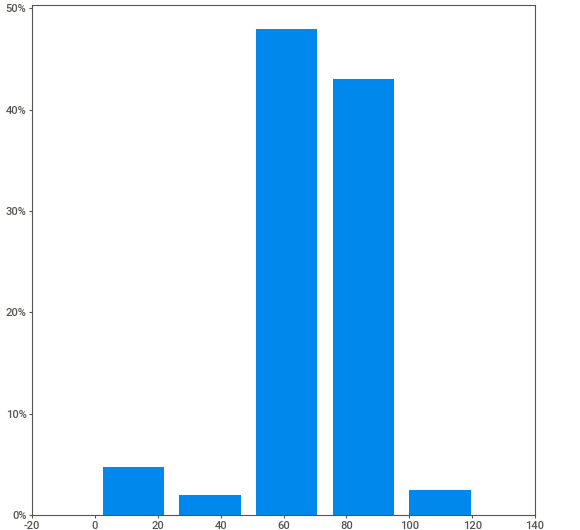
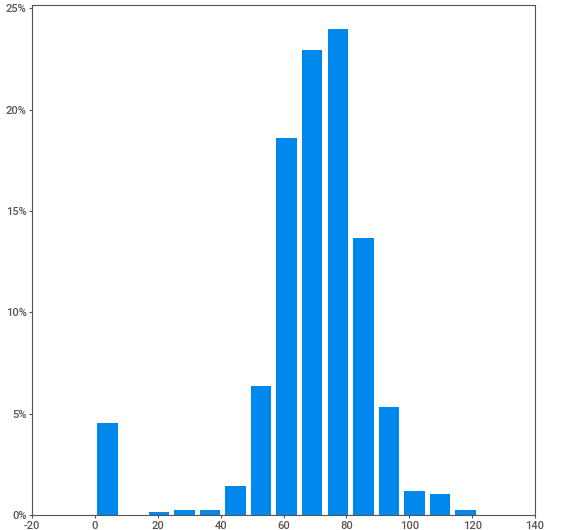
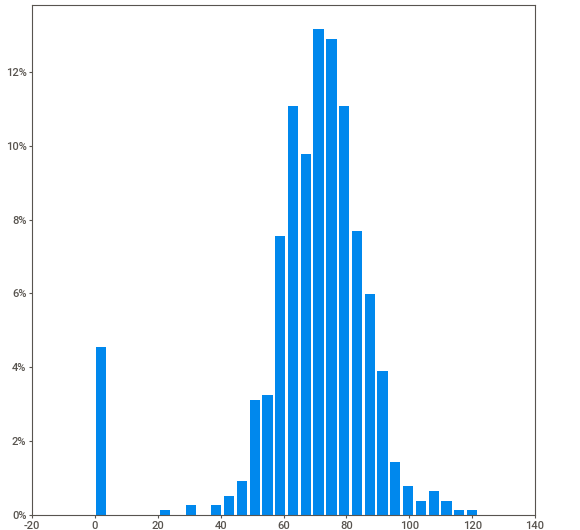
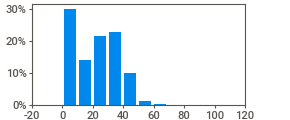
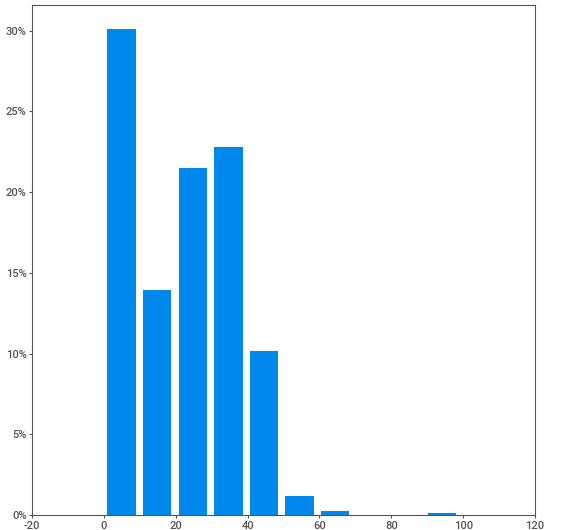
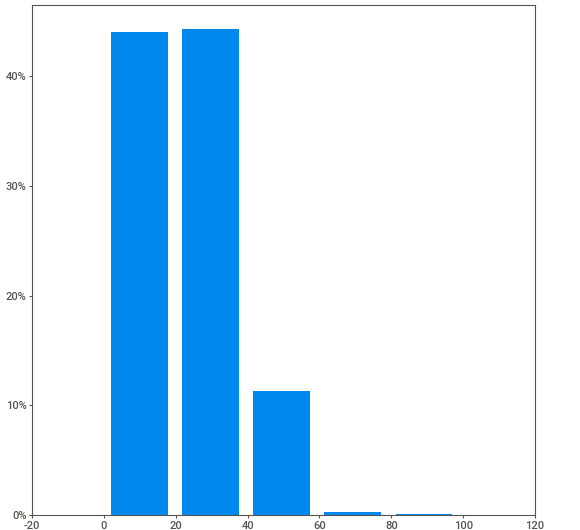
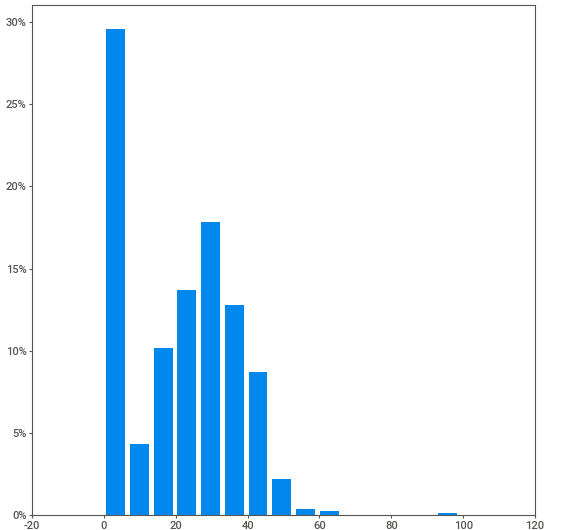
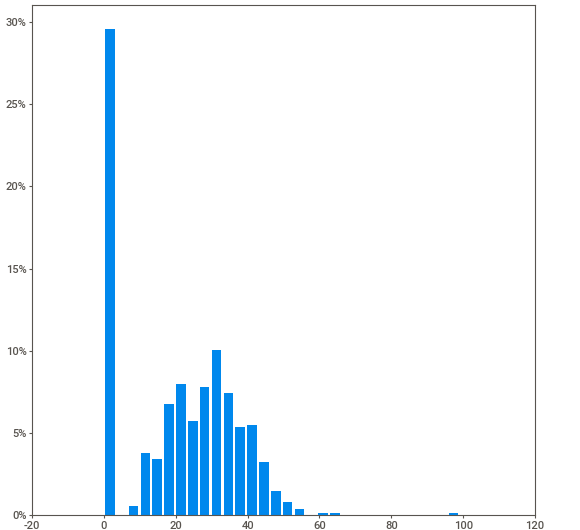
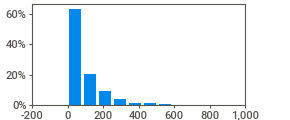
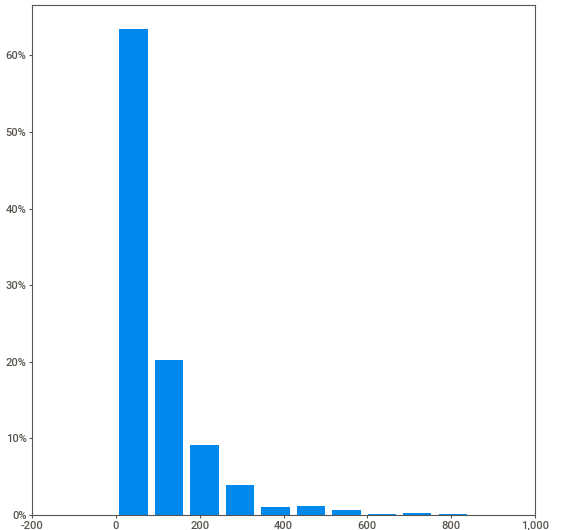
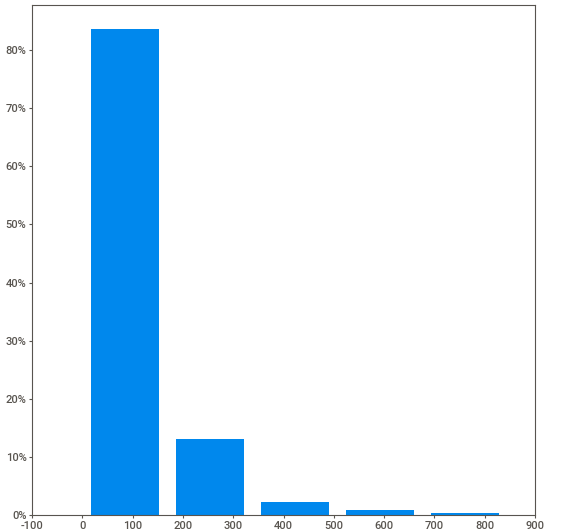
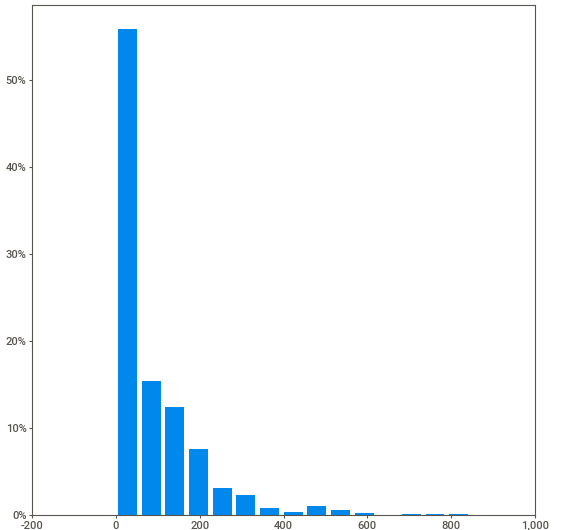
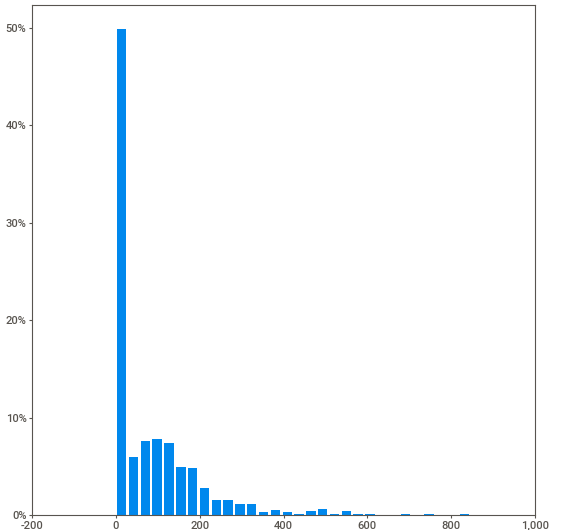
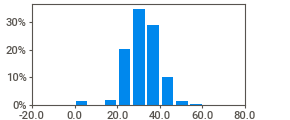
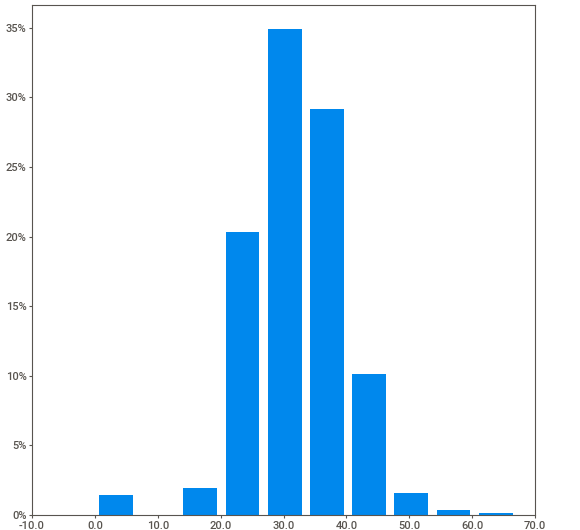
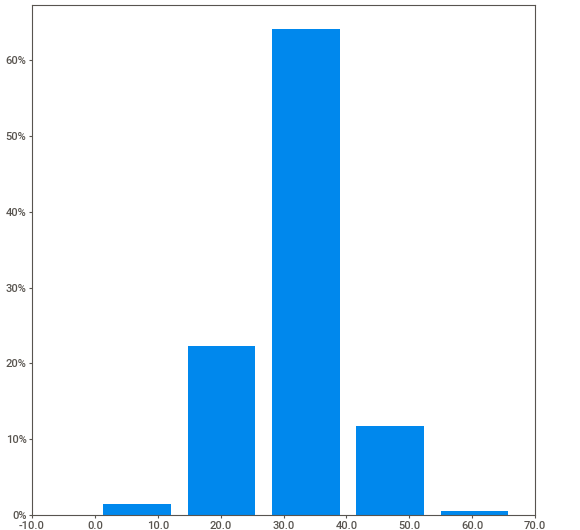
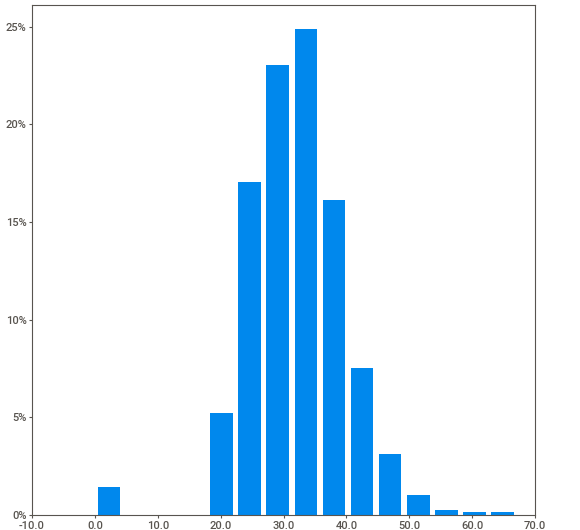
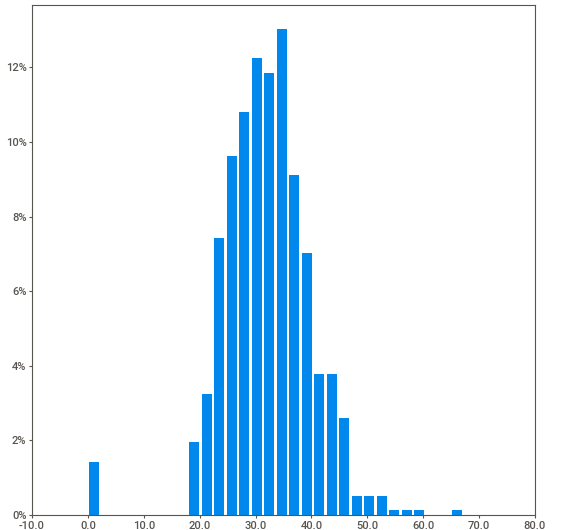
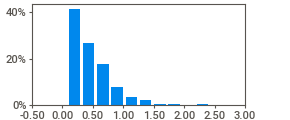
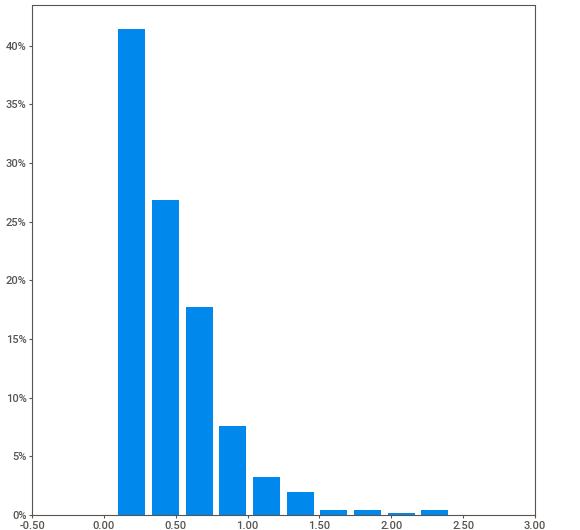
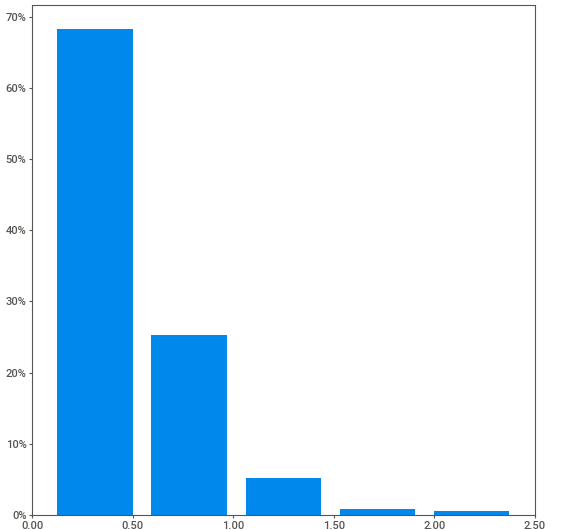
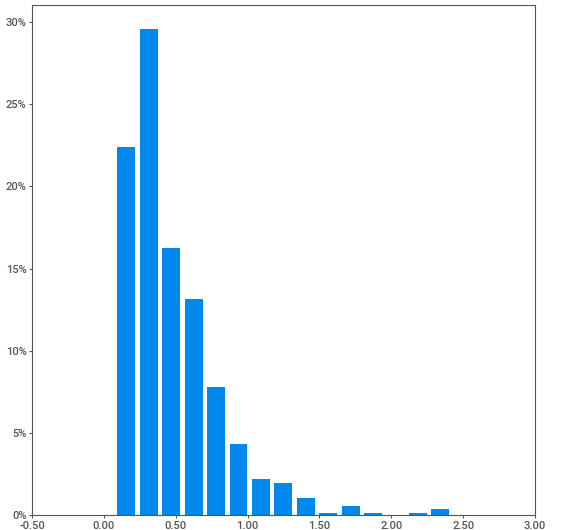
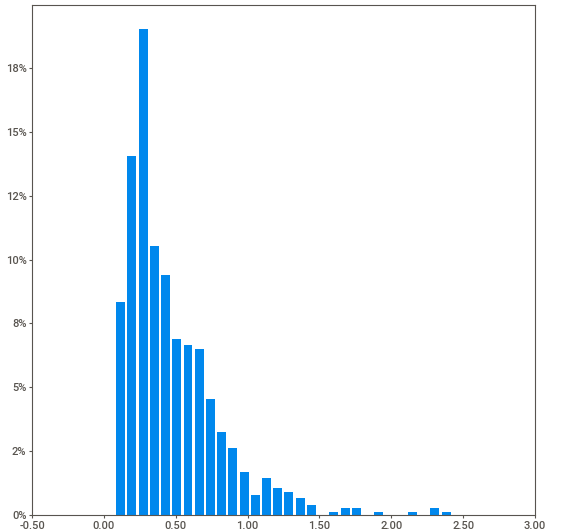
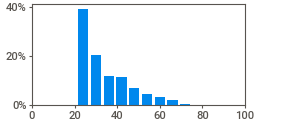
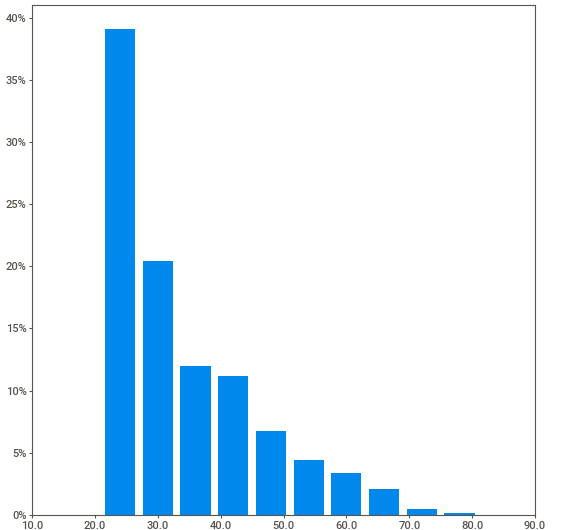
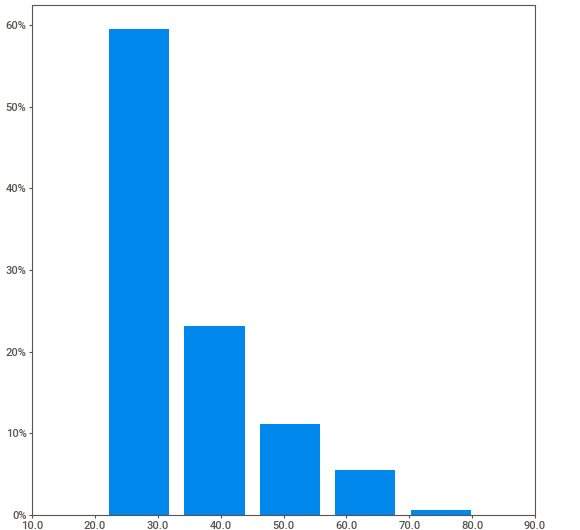
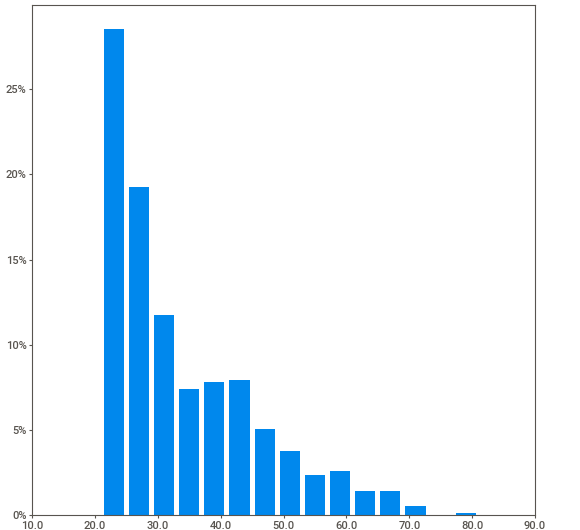
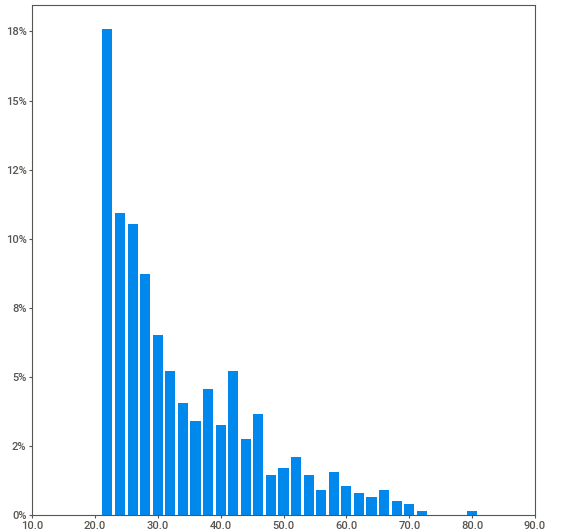
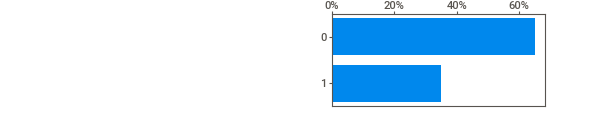
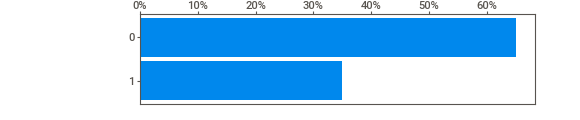
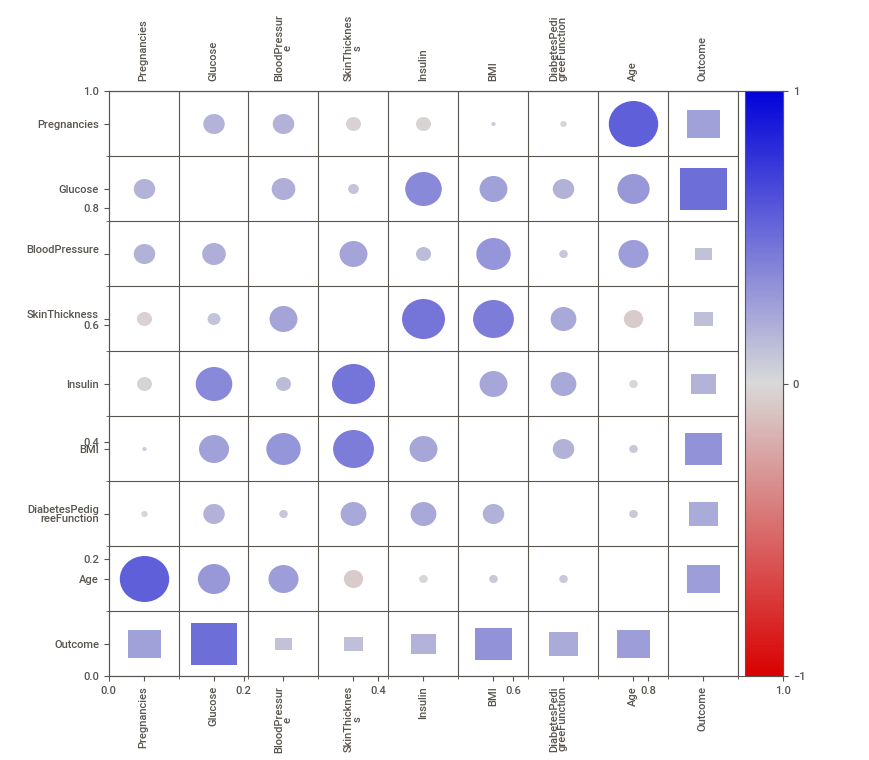
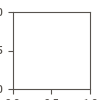

In [2]:
try:
    import sweetviz
except:
    !pip install sweetviz --user
    print('Restart runtime to import sweetviz')
    import sweetviz
import pandas as pd
df = pd.read_csv('health_care_diabetes.csv')
analysis = sweetviz.analyze(df)
analysis.show_notebook() # or export with show_html()